In [1]:
#Importing the basic librarires
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display
from scipy.sparse import csr_matrix
# from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import pickle
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet


c:\Users\david\anaconda3\envs\tu_entorno\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Importing plotly failed. Interactive plots will not work.


In [2]:
# importar el dataset
df = pd.read_excel('Reporte Maestro LaPeninsula 24.xlsx', sheet_name='Raw Data')
print('\n\033[1mInferencia:\033[0m El conjunto de datos contiene {} características y {} muestras.'.format(df.shape[1], df.shape[0]))
df1=df.copy()


Inferencia: El conjunto de datos contiene 37 características y 79667 muestras.


In [3]:
#comprobar el tipo de datos de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79667 entries, 0 to 79666
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AÑO              79667 non-null  int64         
 1   Semana           79667 non-null  int64         
 2   Dia              79667 non-null  object        
 3   Mes              79667 non-null  object        
 4   Fecha            79667 non-null  datetime64[ns]
 5   Número           37767 non-null  object        
 6   TPV              37767 non-null  object        
 7   Tarifa           37767 non-null  object        
 8   Fecha Creación   37767 non-null  datetime64[ns]
 9   Tipo Doc.        37767 non-null  object        
 10  Cliente          44 non-null     object        
 11  País             43 non-null     object        
 12  CIF/NIF          32 non-null     object        
 13  Cuenta Contable  0 non-null      float64       
 14  Dirección        29 non-null     objec

In [4]:
# comprobar el número de valores únicos en cada columna
print(df.nunique().sort_values())

Color                  0
Cuenta Contable        0
Cód. Descuento         0
Cód. Promoción         0
Talla                  0
Dto. € Ticket          1
País                   1
Tarifa                 1
Grupo Mayor            2
Provincia              2
TPV                    2
Población              3
Tipo Doc.              3
AÑO                    3
Dto. €                 4
Impuesto %             5
Recargo %              5
Dto. % Ticket          5
Dto. %                 6
Código Postal          6
Dirección              9
CIF/NIF                9
Cliente               11
Usuario               12
Mes                   14
Dia                   14
Familia               19
Semana                50
Precio               130
Producto             262
Precio Coste         283
Cantidad             416
Fecha                488
Base                1024
Total               1552
Fecha Creación     20210
Número             20866
dtype: int64


In [5]:
#Comprobar el estadístico descriptivo de las variables numéricas
display(df1.describe())

AÑO        Semana  Cuenta Contable  Código Postal  Talla  \
count  79667.000000  79667.000000              0.0      19.000000    0.0   
mean    2023.160593     23.789311              NaN   28676.157895    NaN   
std        0.466531     15.696630              NaN    2790.471730    NaN   
min     2022.000000      1.000000              NaN   28001.000000    NaN   
25%     2023.000000     11.000000              NaN   28009.000000    NaN   
50%     2023.000000     20.000000              NaN   28009.000000    NaN   
75%     2023.000000     38.000000              NaN   28034.000000    NaN   
max     2024.000000     52.000000              NaN   40196.000000    NaN   

       Color      Cantidad  Precio Coste        Precio        Dto. %  \
count    0.0  79667.000000  37767.000000  79667.000000  37767.000000   
mean     NaN      1.085903      3.949161      8.462759      0.224535   
std      NaN      0.966804      7.589199     18.181103      4.658820   
min      NaN     -4.000000      0.000000      0.000000      0.000000   
25%      NaN      1.000000      0.780000      1.500000      0.000000   
50%      NaN      1.000000      1.750000      4.900000      0.000000   
75%      NaN      1.000000      3.000000      5.900000      0.000000   
max      NaN    150.000000     57.230000    210.000000    100.000000   

             Dto. €  Cód. Promoción  Cód. Descuento    Impuesto %  \
count  37767.000000             0.0             0.0  37767.000000   
mean       0.000781             NaN             NaN     11.083962   
std        0.089197             NaN             NaN      4.527990   
min        0.000000             NaN             NaN      0.000000   
25%        0.000000             NaN             NaN     10.000000   
50%        0.000000             NaN             NaN     10.000000   
75%        0.000000             NaN             NaN     10.000000   
max       12.010000             NaN             NaN     21.000000   

          Recargo %          Base         Total  Dto. € Ticket  Dto. % Ticket  
count  37767.000000  37767.000000  79667.000000        37767.0   37767.000000  
mean       1.871310      6.219735      5.649275            0.0       0.286758  
std        1.383087     13.227330     11.016847            0.0       4.474132  
min        0.000000    -59.730000    -65.700000            0.0       0.000000  
25%        1.400000      1.650000      2.000000            0.0       0.000000  
50%        1.400000      4.500000      4.900000            0.0       0.000000  
75%        1.400000      7.360000      5.900000            0.0       0.000000  
max        5.200000    918.640000   1010.500000            0.0     100.000000

**Inferencia:** Las estadísticas parecen estar bien, permítenos ganar más comprensión del conjunto de datos mediante visualizaciones.

## <center> 2.  Análisis exploratorio de datos (AED)

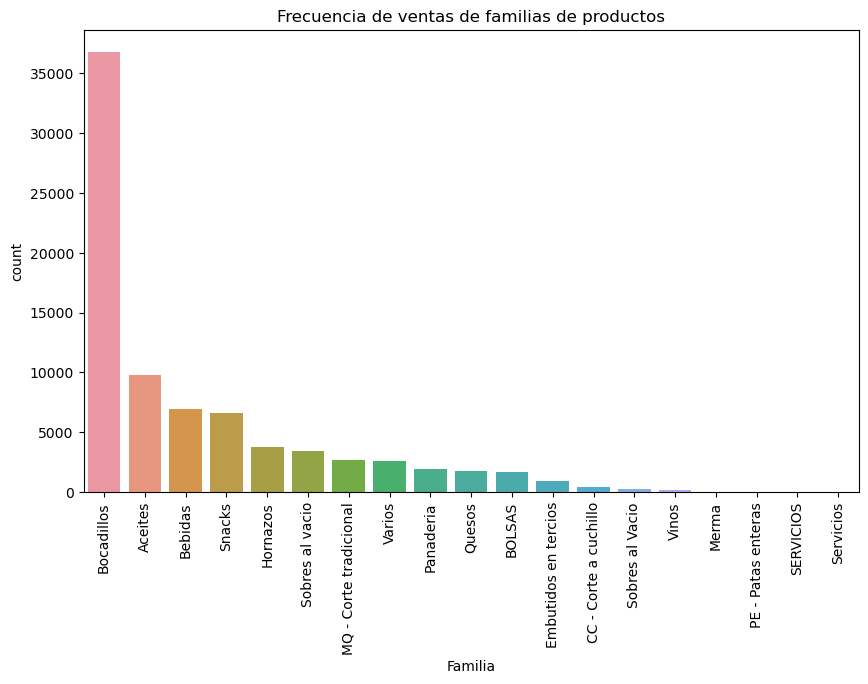

In [6]:
# Distribución de la Familia de productos
sns.countplot(df.Familia, order=df.Familia.value_counts().index)
plt.title('Frecuencia de ventas de familias de productos')
plt.xticks(rotation=90)
# mostrar el gráfico completo
plt.show()

**Inferencia:** La mayoría de ventas proceden de bocadillos, aceites y bebidas

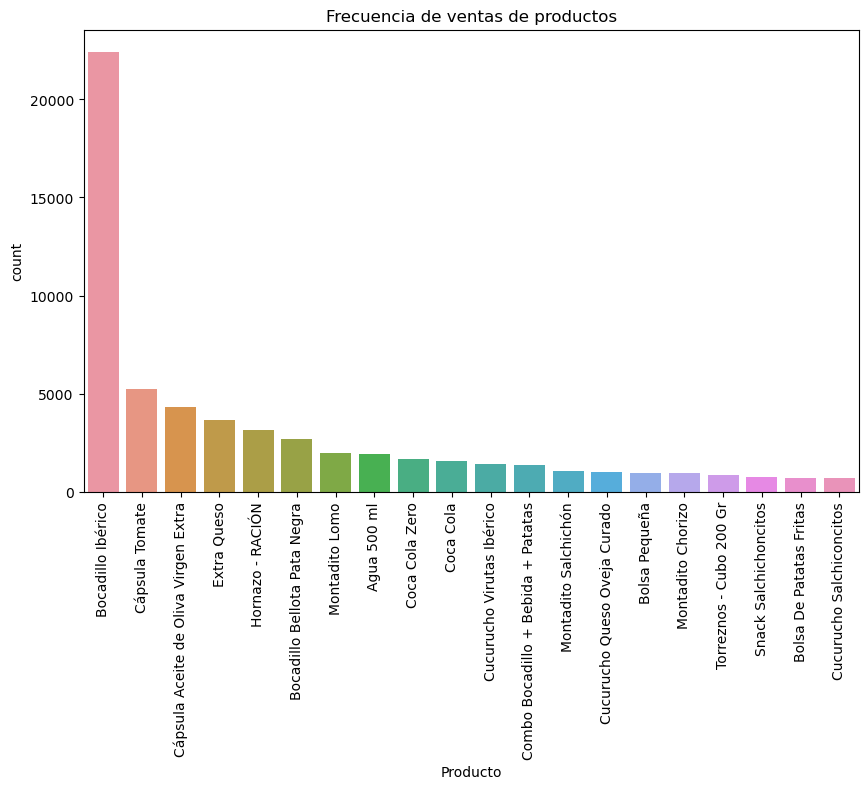

In [7]:
#Distribución de los productos
sns.countplot(df.Producto, order=df.Producto.value_counts().index[:20])
plt.title('Frecuencia de ventas de productos')
plt.xticks(rotation=90)
plt.show()

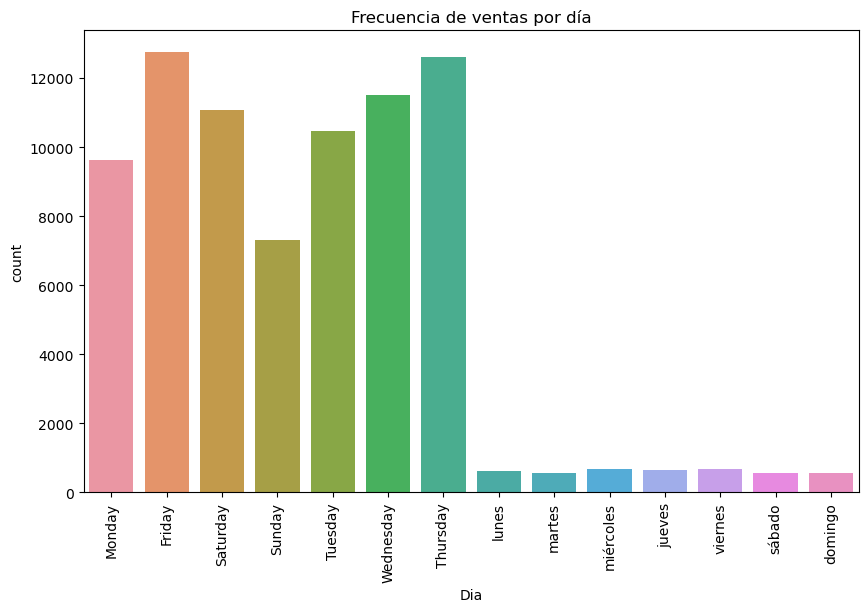

In [8]:
#Distribución de la ventas por día
import seaborn as sns

sns.countplot(df.Dia)#, order=df.aisle.value_counts().index[:20])
plt.title('Frecuencia de ventas por día')
plt.xticks(rotation=90)
# size
plt.rcParams['figure.figsize'] = [10,6]
plt.show()

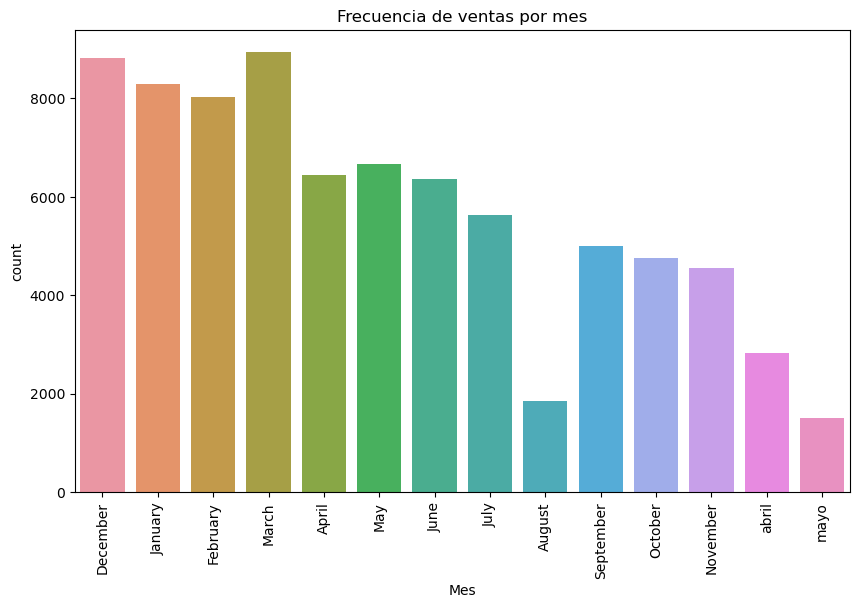

In [9]:
#Distribución de la ventas por mes
sns.countplot(df.Mes)
plt.title('Frecuencia de ventas por mes')
plt.xticks(rotation=90)
plt.show()

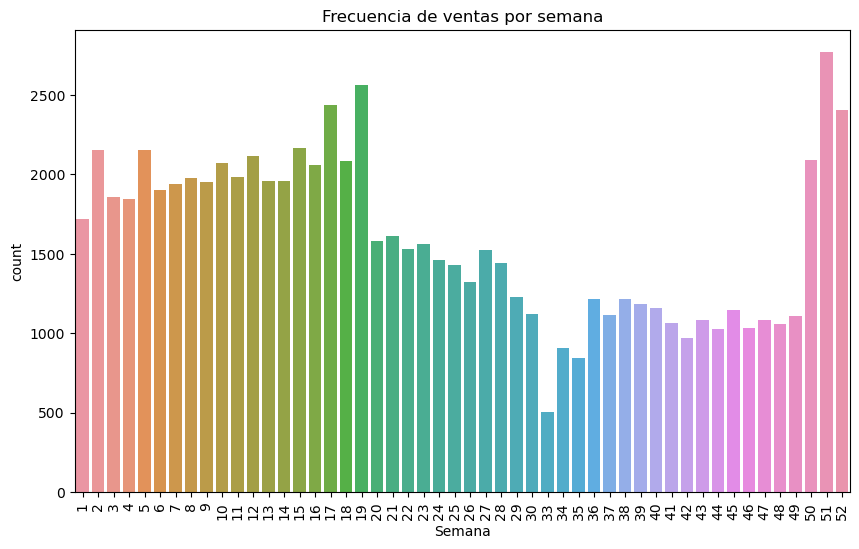

In [10]:
#Distribución de la ventas por semana
sns.countplot(df.Semana)
plt.title('Frecuencia de ventas por semana')
plt.xticks(rotation=90)
plt.show()

## <center> 3. Preprocesamiento de datos

In [11]:
#Comprueban los valores únicos de las columnas
print(df.isnull().sum())
print('\n\033[1mInferencia:\033[0m El conjunto de datos tiene muchos elementos nulos')

AÑO                    0
Semana                 0
Dia                    0
Mes                    0
Fecha                  0
Número             41900
TPV                41900
Tarifa             41900
Fecha Creación     41900
Tipo Doc.          41900
Cliente            79623
País               79624
CIF/NIF            79635
Cuenta Contable    79667
Dirección          79638
Población          79648
Provincia          79651
Código Postal      79648
Usuario            41899
Grupo Mayor        69798
Familia                0
Producto               0
Talla              79667
Color              79667
Cantidad               0
Precio Coste       41900
Precio                 0
Dto. %             41900
Dto. €             41900
Cód. Promoción     79667
Cód. Descuento     79667
Impuesto %         41900
Recargo %          41900
Base               41900
Total                  0
Dto. € Ticket      41900
Dto. % Ticket      41900
dtype: int64

Inferencia: El conjunto de datos tiene muchos elementos nulos

In [12]:
def modificar_dataset(dataset, seed):
    '''
    la función modificar_dataset toma un conjunto de datos y realiza las siguientes operaciones:
    - Reemplazar los valores de la columna Familia mediante replace
    - Reemplazar los valores de la columna Dia mediante replace
    - Reemplazar los valores de la columna Mes mediante replace
    - Eliminar columnas con más del 79600 valores nulos
    - Eliminar filas con valores nulos
    - Crear una nueva columna con la hora de la compra a partir de la columna Fecha Creación
    - Sustituir valores en la columna Dia con replace para convertirlos en números
    - Crear una columna llamada days_since_prior_order que indica el número de días desde la última compra de un producto en función de la columna Fecha
    - Crear columna llamada client_id que indica el id del cliente en función de la columna Número de forma ascendentemente empezando desde 0
    - Crear columna llamada product_id que indica el id del producto en función de la columna Producto de forma ascendentemente empezando desde 0
    - Crear columna llamada user_id en función de la columna order_id de forma aleatoria
    parámetros:
    - dataset: conjunto de datos
    retorna:
    - dataset: conjunto de datos modificado
    '''
    # se remplazan los valores de la columna Familia mediante replace
    dataset['Familia'] = dataset['Familia'].replace({'BOLSAS': 'Bolsas', 'Sobres al Vacio': 'Sobres al vacio', 'SERVICIOS': 'Servicios'})
    # se reemplazan los valores de la columna Dia mediante replace
    dataset['Dia'] = dataset['Dia'].replace({'Monday': 'lunes', 'Friday': 'viernes', 'Saturday': 'sábado', 'Sunday': 'domingo', 'Thursday': 'jueves', 'Tuesday': 'martes', 'Wednesday': 'miércoles'})
    # se reemplazan los valores de la columna Mes mediante replace
    dataset['Mes'] = dataset['Mes'].replace({'December': 'diciembre', 'November': 'noviembre', 'October': 'octubre', 'September': 'septiembre', 'August': 'agosto', 'July': 'julio', 'June': 'junio', 'May': 'mayo', 'April': 'abril', 'March': 'marzo', 'February': 'febrero', 'January': 'enero'})
    # Eliminar columnas con más del 79600 valores nulos
    dataset = dataset.drop(['Color', 'Cuenta Contable', 'Cód. Descuento', 'Cód. Promoción', 'Talla', 'Cliente', 'País', 'CIF/NIF', 'Dirección', 'Población', 'Provincia', 'Código Postal', 'Usuario', 'Grupo Mayor'], axis=1)
    # crear una nueva columna con la hora de la compra a partir de la columna Fecha Creación
    dataset['Hora'] = dataset['Fecha Creación'].apply(lambda x: x.hour)
    # sustituir valores nulos en la columna Hora por 0
    dataset['Hora'] = dataset['Hora'].fillna(0)
    # cambiar tipo de columna Hora a entero
    dataset['Hora'] = dataset['Hora'].astype(int)
    # sustituir valores en la columna Dia con replace para convertirlos en números
    dataset['Dia'] = dataset['Dia'].replace({'lunes': 1, 'martes': 2, 'miércoles': 3, 'jueves': 4, 'viernes': 5, 'sábado': 6, 'domingo': 7})
    # crear una columna llamada days_since_prior_order que indica el número de días desde la última compra de un producto en funcion de la columna Fecha
    dataset['days_since_prior_order'] = dataset.groupby('Producto')['Fecha'].diff().dt.days
    dataset['days_since_prior_order'].fillna(0, inplace=True)
    dataset['days_since_prior_order'] = dataset['days_since_prior_order'].astype(int)
    # crear columna llamada client_id que indica el id del cliente en función de la columna Número de forma ascendentemente empezando desde 0
    dataset['order_id'] = dataset['Número'].astype('category').cat.codes
    dataset['order_id'] = dataset['order_id'].astype(int)
    # crear columna llamada product_id que indica el id del producto en función de la columna Producto de forma ascendentemente empezando desde 0
    dataset['product_id'] = dataset['Producto'].astype('category').cat.codes
    dataset['product_id'] = dataset['product_id'].astype(int)
    # crear columna llamada user_id en función de la columna order_id de forma aleatoria
    np.random.seed(seed)
    dataset['user_id'] = dataset.groupby('order_id')['order_id'].transform(lambda x: np.random.randint(0, 1000))
    dataset['user_id'] = dataset['user_id'].astype(int)
    # eliminar filas con valores nulos
    dataset = dataset.dropna(axis=0)
    dataset = dataset.drop_duplicates()
    return dataset


In [13]:
df1 = df.copy()
df1 = modificar_dataset(df1, 42)
display(df1.head())

AÑO  Semana  Dia     Mes      Fecha    Número       TPV   Tarifa  \
41900  2023      33    2  agosto 2023-08-15  T/000003  SERVIDOR  General   
41901  2023      33    2  agosto 2023-08-15  T/000004  SERVIDOR  General   
41902  2023      33    2  agosto 2023-08-15  T/000004  SERVIDOR  General   
41903  2023      33    2  agosto 2023-08-15  T/000005  SERVIDOR  General   
41904  2023      33    2  agosto 2023-08-15  T/000006  SERVIDOR  General   

           Fecha Creación   Tipo Doc.  ... Recargo %  Base  Total  \
41900 2023-08-15 11:00:00  Fra. Simp.  ...       1.4  4.45    4.9   
41901 2023-08-15 12:02:00  Fra. Simp.  ...       1.4  9.00    9.9   
41902 2023-08-15 12:02:00  Fra. Simp.  ...       1.4  1.36    1.5   
41903 2023-08-15 12:08:00  Fra. Simp.  ...       1.4  8.91    9.8   
41904 2023-08-15 12:33:00  Fra. Simp.  ...       1.4  4.45    4.9   

       Dto. € Ticket  Dto. % Ticket  Hora  days_since_prior_order  order_id  \
41900            0.0            0.0    11                      16         8   
41901            0.0            0.0    12                      16         9   
41902            0.0            0.0    12                      17         9   
41903            0.0            0.0    12                      16        10   
41904            0.0            0.0    12                       0        11   

       product_id  user_id  
41900          44      121  
41901          39      466  
41902          48      466  
41903          43      214  
41904          43      330  

[5 rows x 28 columns]

In [14]:
print('\n\033[1mInferencia:\033[0m El conjunto de datos no tiene elementos nulos')


Inferencia: El conjunto de datos no tiene elementos nulos


In [15]:
print('\n\033[1mInferencia:\033[0m El conjunto de datos no tiene duplicados')


Inferencia: El conjunto de datos no tiene duplicados


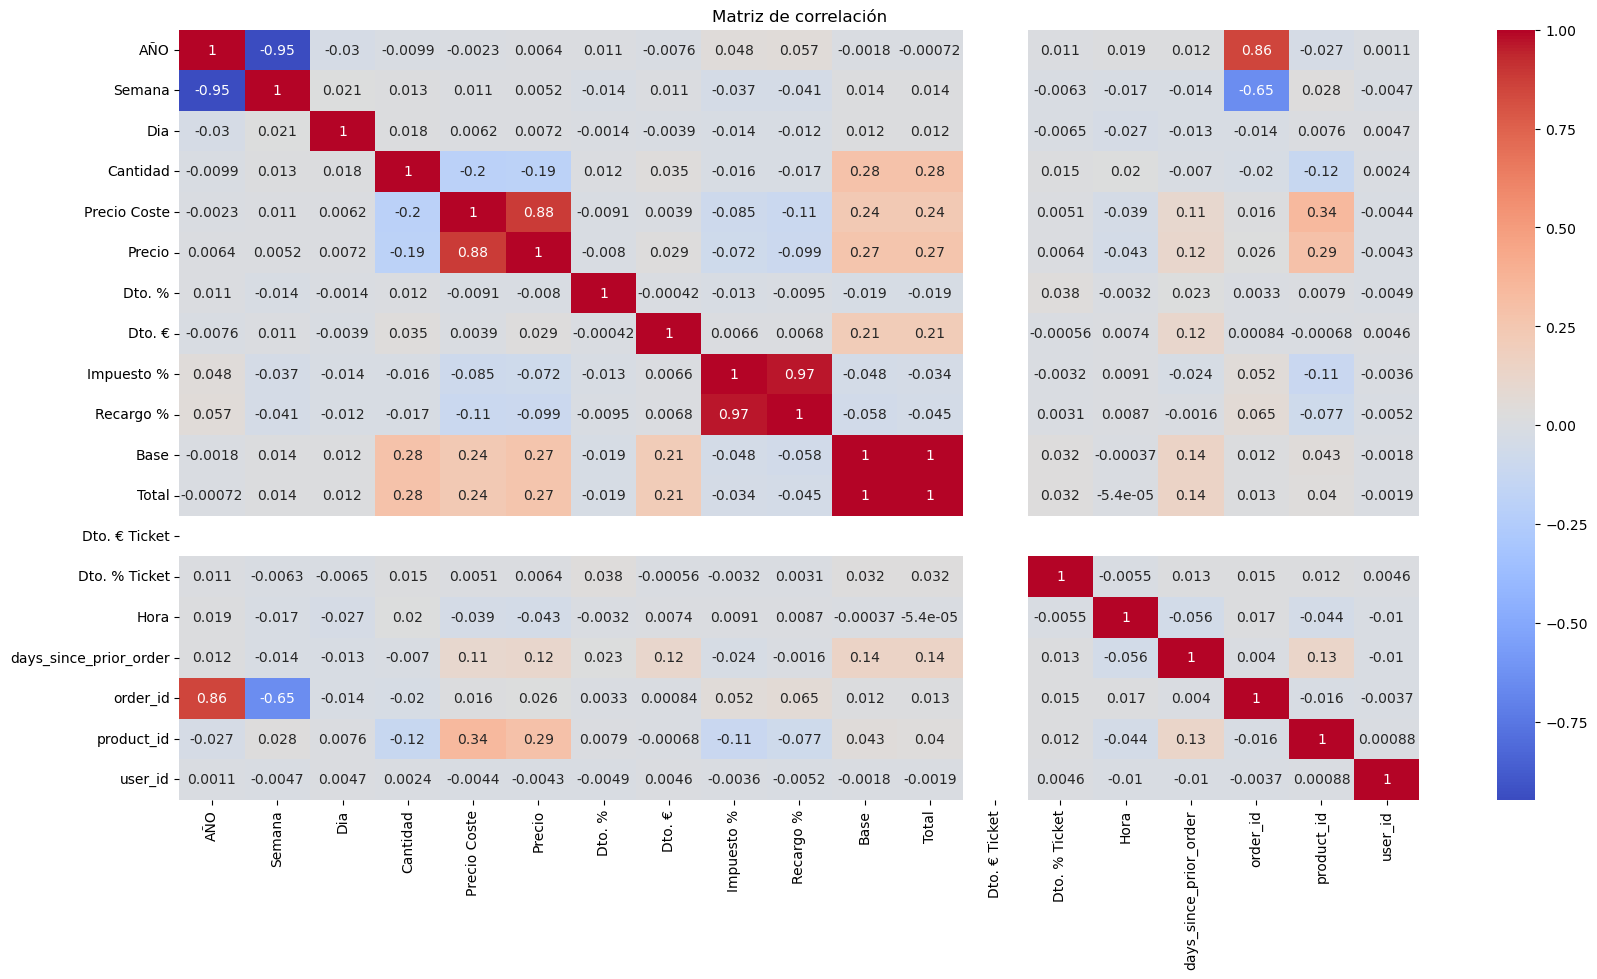

In [16]:
# crear matriz de correlación con seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

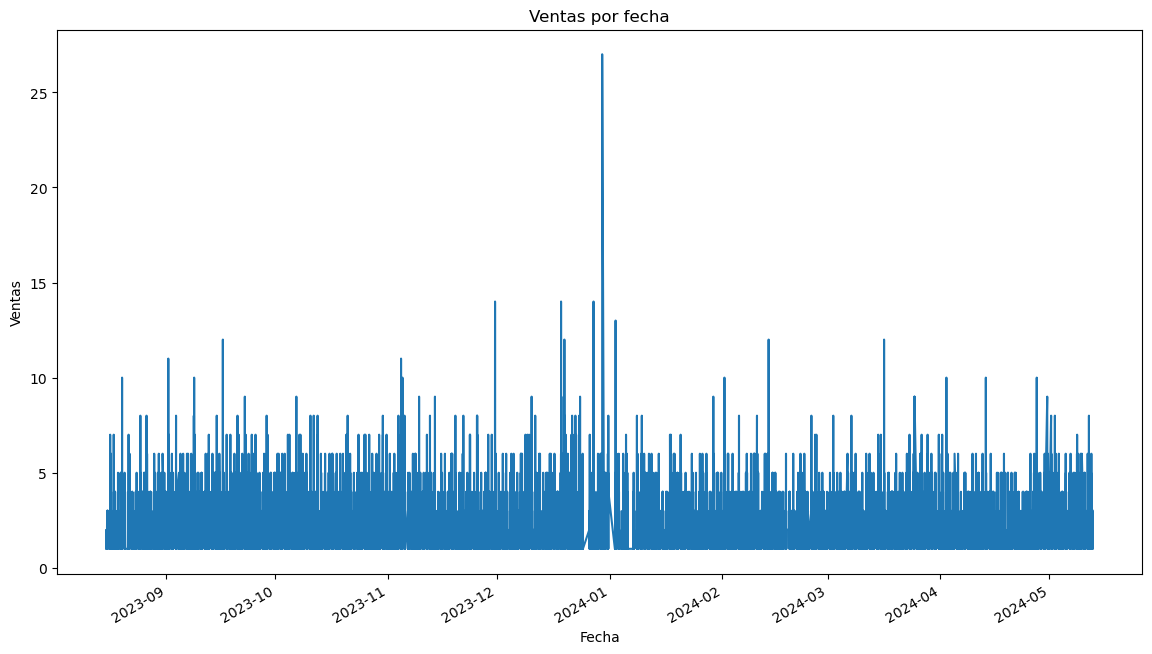

In [17]:
# crear gráfico de series temporales
plt.figure(figsize=(14, 8))
df1['Fecha Creación'].value_counts().sort_index().plot()
plt.title('Ventas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

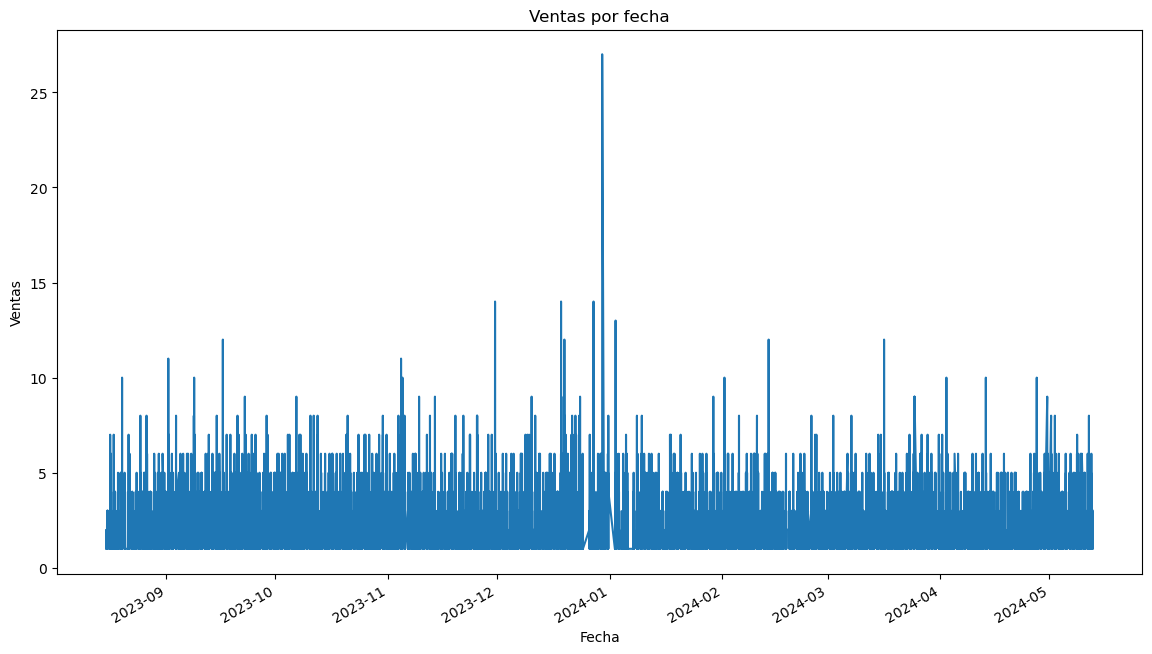

In [18]:
# crear gráfico de series temporales
plt.figure(figsize=(14, 8))
df1['Fecha Creación'].value_counts().sort_index().plot()
plt.title('Ventas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

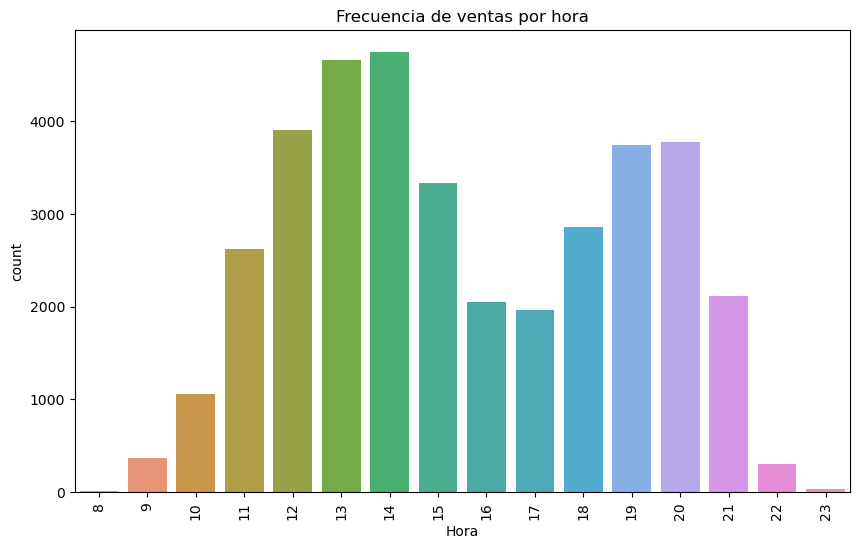

In [19]:
# Distribución de la venta por horas
sns.countplot(df1['Hora'])
plt.title('Frecuencia de ventas por hora')
plt.xticks(rotation=90)
plt.show()

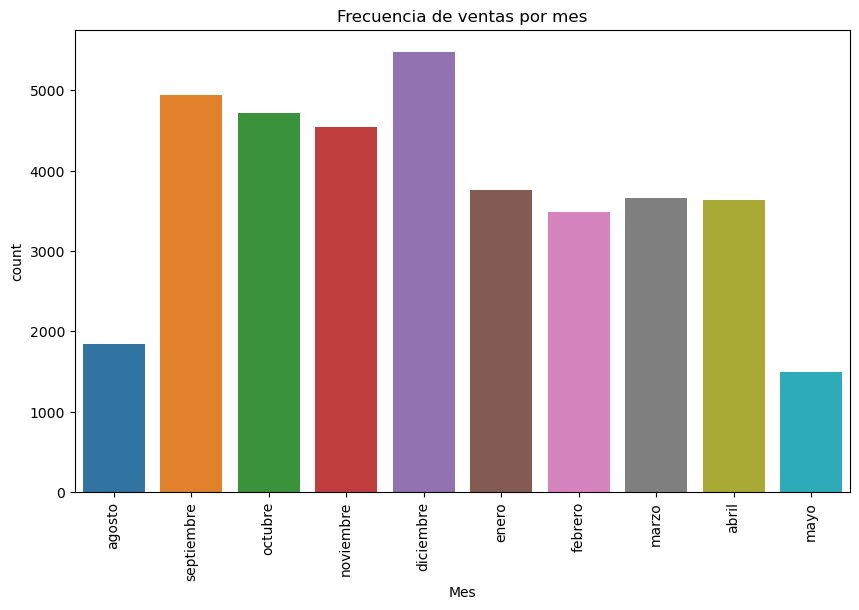

In [20]:
# Distribución de la venta por mes
sns.countplot(df1['Mes'])
plt.title('Frecuencia de ventas por mes')
plt.xticks(rotation=90)
plt.show()

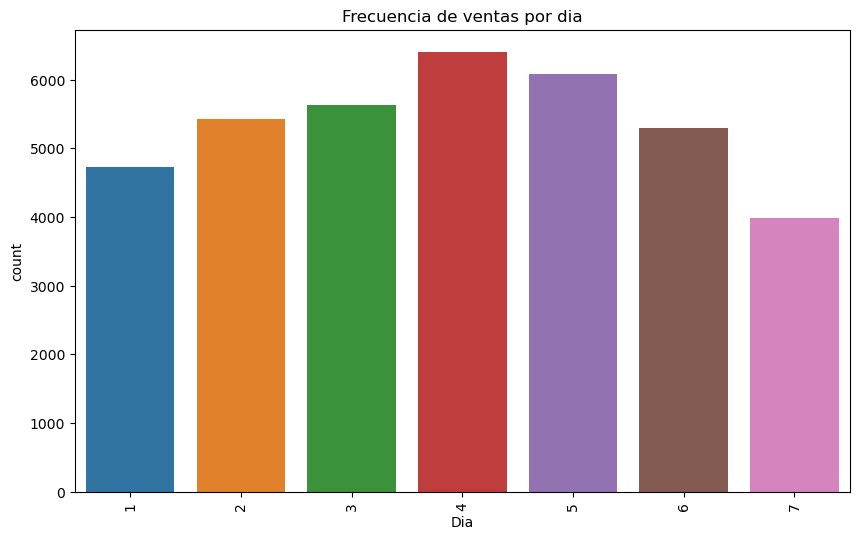

In [21]:
# Distribución de la venta por dia
sns.countplot(df1['Dia'])
plt.title('Frecuencia de ventas por dia')
plt.xticks(rotation=90)
plt.show()

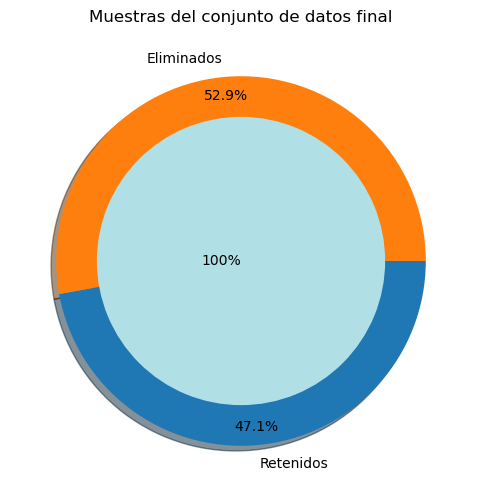


Inferencia:El conjunto de datos final después de su limpieza tiene 37551 columnas y 28 filas.


In [22]:
# Tamaño final del dataset después de realizar el preprocesamiento
plt.title('Muestras del conjunto de datos final')
plt.pie([df1.shape[0], df.shape[0]-df1.shape[0]], radius = 1, shadow=True,labels=['Retenidos','Eliminados'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()
print('\n\033[1mInferencia:\033[0mEl conjunto de datos final después de su limpieza tiene {} columnas y {} filas.'.format(df1.shape[0], df1.shape[1]))

In [23]:
dummies_df = pd.get_dummies(data=df1, prefix=['Day','Hour'], columns=['Dia','Hora'], drop_first=False)
dummies_df.head()

AÑO  Semana     Mes      Fecha    Número       TPV   Tarifa  \
41900  2023      33  agosto 2023-08-15  T/000003  SERVIDOR  General   
41901  2023      33  agosto 2023-08-15  T/000004  SERVIDOR  General   
41902  2023      33  agosto 2023-08-15  T/000004  SERVIDOR  General   
41903  2023      33  agosto 2023-08-15  T/000005  SERVIDOR  General   
41904  2023      33  agosto 2023-08-15  T/000006  SERVIDOR  General   

           Fecha Creación   Tipo Doc.     Familia  ... Hour_14  Hour_15  \
41900 2023-08-15 11:00:00  Fra. Simp.  Bocadillos  ...       0        0   
41901 2023-08-15 12:02:00  Fra. Simp.  Bocadillos  ...       0        0   
41902 2023-08-15 12:02:00  Fra. Simp.      Snacks  ...       0        0   
41903 2023-08-15 12:08:00  Fra. Simp.  Bocadillos  ...       0        0   
41904 2023-08-15 12:33:00  Fra. Simp.  Bocadillos  ...       0        0   

       Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
41900        0        0        0        0        0        0        0        0  
41901        0        0        0        0        0        0        0        0  
41902        0        0        0        0        0        0        0        0  
41903        0        0        0        0        0        0        0        0  
41904        0        0        0        0        0        0        0        0  

[5 rows x 49 columns]

In [24]:
def reduce_mem_usage(df):
    """
    la función itera a través de todas las columnas de un conjunto de datos y modifica el tipo de datos
    para reducir el uso de la memoria
    parámetros:
    - df: conjunto de datos
    retorna:
    - df: conjunto de datos con uso de memoria reducido
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('El uso de la memoria del dataframe es {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name

        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('El uso de la memoria después de la optimizacion es: {:.2f} MB'.format(end_mem))
    print('Disminuido en un {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

## Clustering y análisis de las variables del dataset preprocesado

In [25]:
# en este análisis se ha utilizado todos los campos del dataset que no sean temporales, pues se han considerado que no aportan información relevante para este ámbito de análisis
# se eliminan las columnas Fecha y Fecha Creación
df2 = df1.copy()
df2 = df2.drop(['Fecha', 'Fecha Creación'], axis=1)
df2.head()

AÑO  Semana  Dia     Mes    Número       TPV   Tarifa   Tipo Doc.  \
41900  2023      33    2  agosto  T/000003  SERVIDOR  General  Fra. Simp.   
41901  2023      33    2  agosto  T/000004  SERVIDOR  General  Fra. Simp.   
41902  2023      33    2  agosto  T/000004  SERVIDOR  General  Fra. Simp.   
41903  2023      33    2  agosto  T/000005  SERVIDOR  General  Fra. Simp.   
41904  2023      33    2  agosto  T/000006  SERVIDOR  General  Fra. Simp.   

          Familia                      Producto  ...  Recargo %  Base  Total  \
41900  Bocadillos                Bocadillo Lomo  ...        1.4  4.45    4.9   
41901  Bocadillos  Bocadillo Bellota Pata Negra  ...        1.4  9.00    9.9   
41902      Snacks       Bolsa De Patatas Fritas  ...        1.4  1.36    1.5   
41903  Bocadillos             Bocadillo Ibérico  ...        1.4  8.91    9.8   
41904  Bocadillos             Bocadillo Ibérico  ...        1.4  4.45    4.9   

       Dto. € Ticket  Dto. % Ticket  Hora  days_since_prior_order  order_id  \
41900            0.0            0.0    11                      16         8   
41901            0.0            0.0    12                      16         9   
41902            0.0            0.0    12                      17         9   
41903            0.0            0.0    12                      16        10   
41904            0.0            0.0    12                       0        11   

       product_id  user_id  
41900          44      121  
41901          39      466  
41902          48      466  
41903          43      214  
41904          43      330  

[5 rows x 26 columns]

In [26]:
# label encoding
from sklearn.preprocessing import LabelEncoder
# Mes, Número, TPV, Tarifa, Tipo Doc., Familia, Producto
le = LabelEncoder()
df2['Mes'] = le.fit_transform(df2['Mes'])
df2['Tipo Doc.'] = le.fit_transform(df2['Tipo Doc.'])
df2['Familia'] = le.fit_transform(df2['Familia'])
df2['Producto'] = le.fit_transform(df2['Producto'])
df2['Número'] = le.fit_transform(df2['Número'])
df2['TPV'] = le.fit_transform(df2['TPV'])
df2['Tarifa'] = le.fit_transform(df2['Tarifa'])
df2.head()

AÑO  Semana  Dia  Mes  Número  TPV  Tarifa  Tipo Doc.  Familia  \
41900  2023      33    2    1       8    1       0          2        2   
41901  2023      33    2    1       9    1       0          2        2   
41902  2023      33    2    1       9    1       0          2       13   
41903  2023      33    2    1      10    1       0          2        2   
41904  2023      33    2    1      11    1       0          2        2   

       Producto  ...  Recargo %  Base  Total  Dto. € Ticket  Dto. % Ticket  \
41900        15  ...        1.4  4.45    4.9            0.0            0.0   
41901        10  ...        1.4  9.00    9.9            0.0            0.0   
41902        19  ...        1.4  1.36    1.5            0.0            0.0   
41903        14  ...        1.4  8.91    9.8            0.0            0.0   
41904        14  ...        1.4  4.45    4.9            0.0            0.0   

       Hora  days_since_prior_order  order_id  product_id  user_id  
41900    11                      16         8          44      121  
41901    12                      16         9          39      466  
41902    12                      17         9          48      466  
41903    12                      16        10          43      214  
41904    12                       0        11          43      330  

[5 rows x 26 columns]

In [27]:
reduce_preprocessed_df = reduce_mem_usage(df2)

El uso de la memoria del dataframe es 6.02 MB
El uso de la memoria después de la optimizacion es: 1.86 MB
Disminuido en un 69.0%


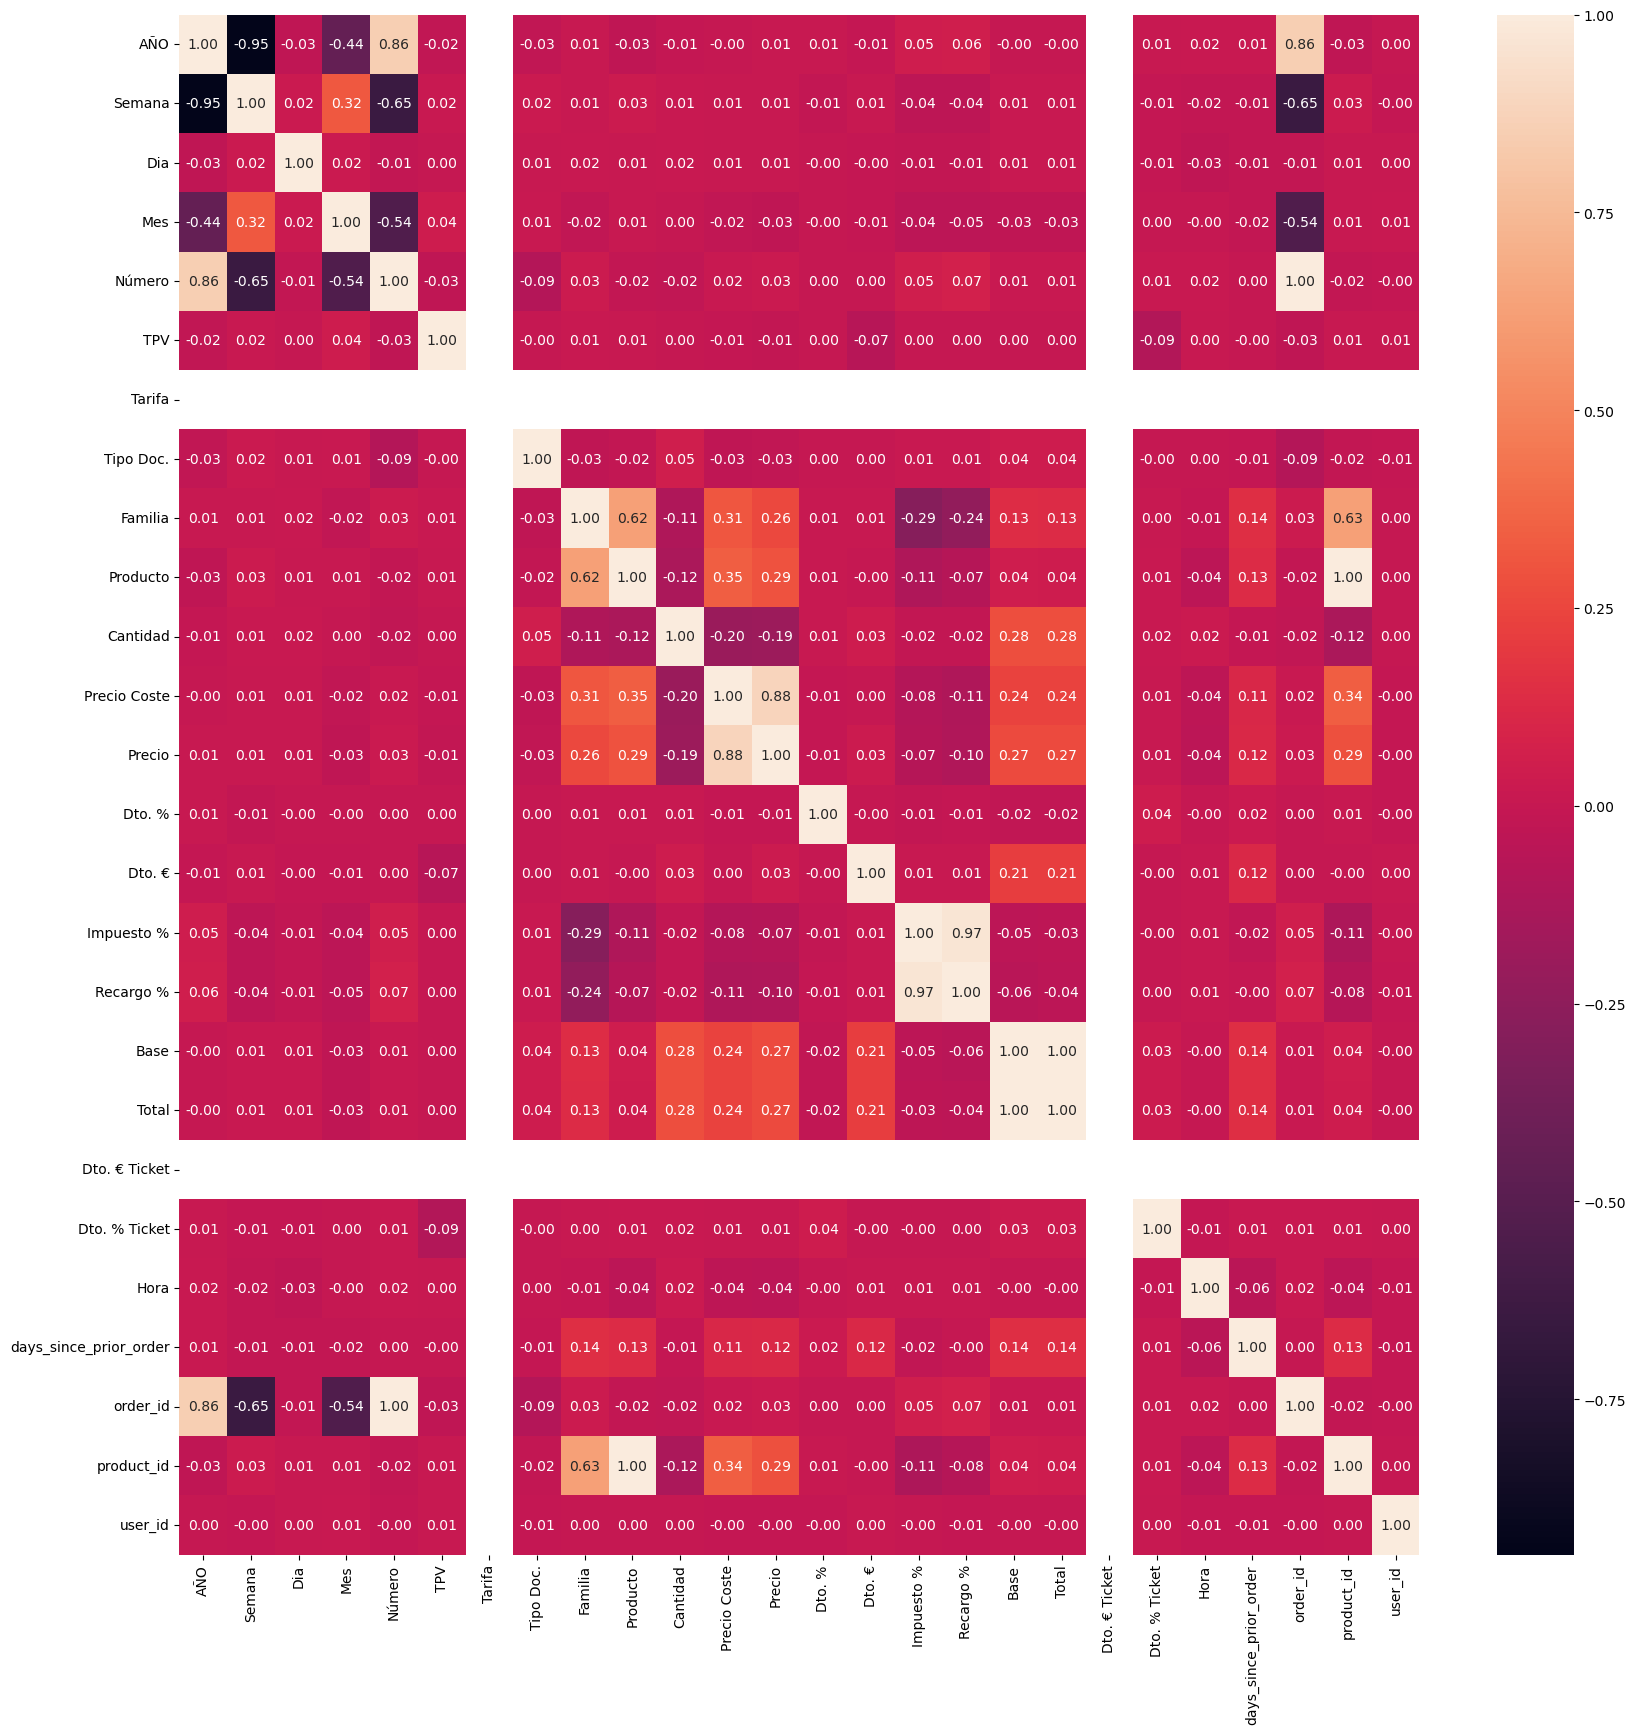

In [28]:
# matriz de correlación de reduced_feature
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = reduce_preprocessed_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [29]:
# mostrar todas las columnas del df
reduce_preprocessed_df.columns

Index(['AÑO', 'Semana', 'Dia', 'Mes', 'Número', 'TPV', 'Tarifa', 'Tipo Doc.',
       'Familia', 'Producto', 'Cantidad', 'Precio Coste', 'Precio', 'Dto. %',
       'Dto. €', 'Impuesto %', 'Recargo %', 'Base', 'Total', 'Dto. € Ticket',
       'Dto. % Ticket', 'Hora', 'days_since_prior_order', 'order_id',
       'product_id', 'user_id'],
      dtype='object')

In [30]:
#Splitting Training & Testing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(reduce_preprocessed_df)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


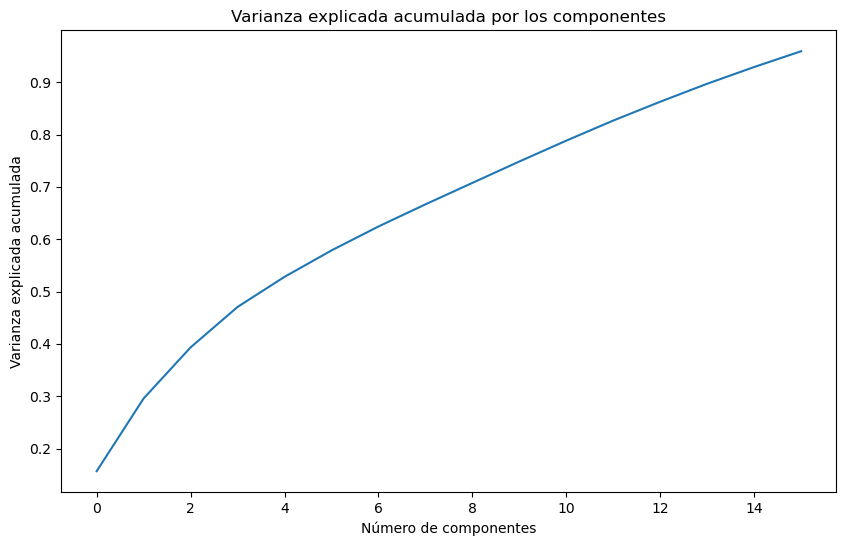

In [31]:
# PCA
# estimar el número de componentes principales
from sklearn.decomposition import PCA
# escoger el número de componentes que explican el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por los componentes')
plt.show()

Silhouette Score para 2 clusters: 0.2408
Silhouette Score para 3 clusters: 0.2377
Silhouette Score para 4 clusters: 0.2481
Silhouette Score para 5 clusters: 0.2499
Silhouette Score para 6 clusters: 0.2067
Silhouette Score para 7 clusters: 0.2082
Silhouette Score para 8 clusters: 0.1925
Silhouette Score para 9 clusters: 0.1939


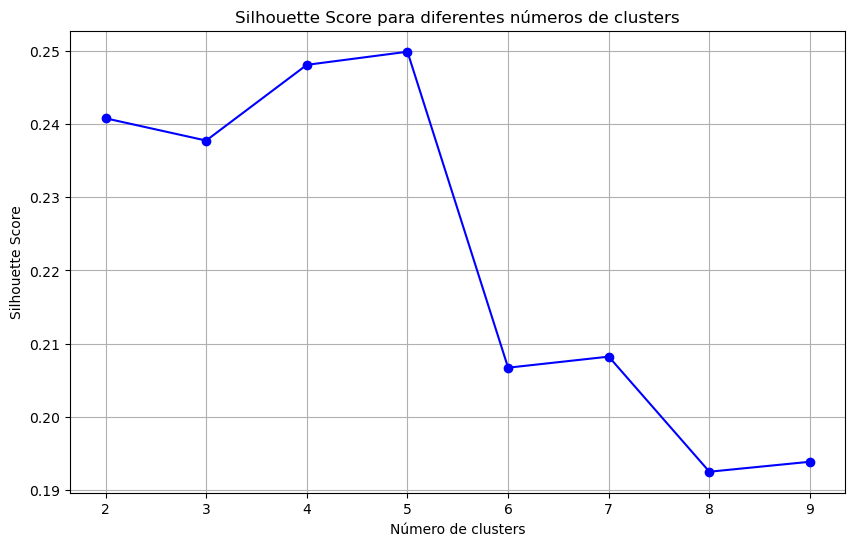

In [32]:
# silhouette_score para determinar el número de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = silhouette_score(X_train_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print('Silhouette Score para {} clusters: {:.4f}'.format(k, score))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.grid(True)
plt.show()

7 y 8 clusters según el método del codo

Calinski Harabasz Score para 2 clusters: 5406.1923
Calinski Harabasz Score para 3 clusters: 4557.8310
Calinski Harabasz Score para 4 clusters: 3816.6268
Calinski Harabasz Score para 5 clusters: 3753.2410
Calinski Harabasz Score para 6 clusters: 3369.8151
Calinski Harabasz Score para 7 clusters: 3336.8845
Calinski Harabasz Score para 8 clusters: 3231.7313
Calinski Harabasz Score para 9 clusters: 3401.0160


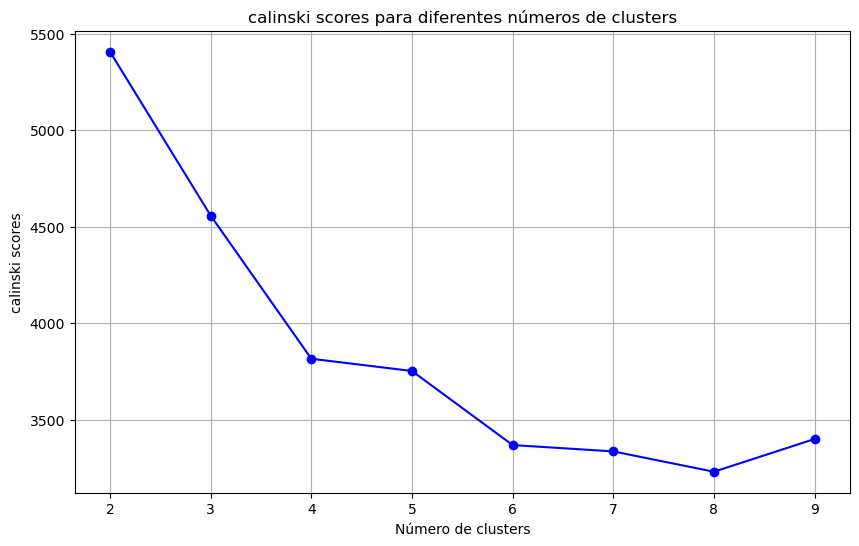

In [33]:
# coeficientes de calinski harabasz
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = calinski_harabasz_score(X_train_pca, kmeans.labels_)
    calinski_scores.append(score)
    print('Calinski Harabasz Score para {} clusters: {:.4f}'.format(k, score))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), calinski_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('calinski scores')
plt.title('calinski scores para diferentes números de clusters')
plt.grid(True)
plt.show()

7 y 9 clusters según el método de calinski_harabasz

Davies Bouldin Score para 2 clusters: 1.7807
Davies Bouldin Score para 3 clusters: 1.6585
Davies Bouldin Score para 4 clusters: 1.6477
Davies Bouldin Score para 5 clusters: 1.4009
Davies Bouldin Score para 6 clusters: 1.6120
Davies Bouldin Score para 7 clusters: 1.4310
Davies Bouldin Score para 8 clusters: 1.5018
Davies Bouldin Score para 9 clusters: 1.4008


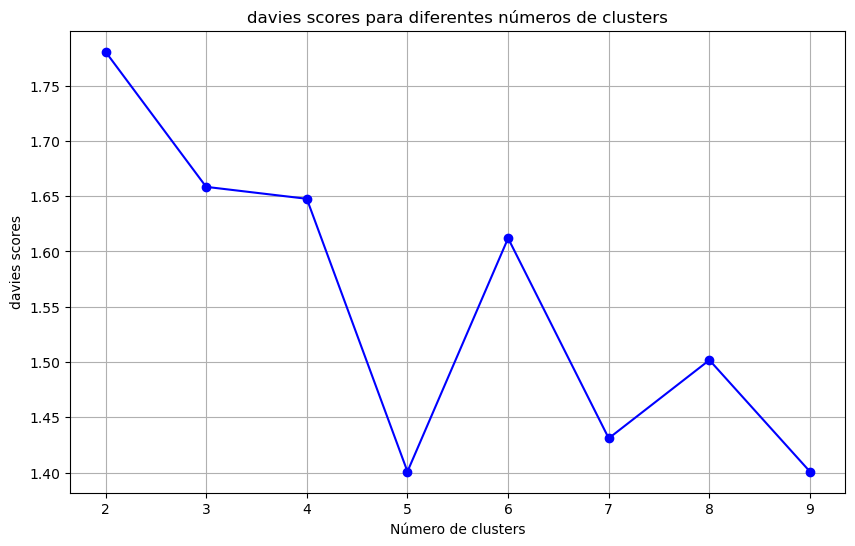

In [34]:
# coeficientes de davies bouldin
from sklearn.metrics import davies_bouldin_score

davies_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = davies_bouldin_score(X_train_pca, kmeans.labels_)
    davies_scores.append(score)
    print('Davies Bouldin Score para {} clusters: {:.4f}'.format(k, score))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), davies_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('davies scores')
plt.title('davies scores para diferentes números de clusters')
plt.grid(True)
plt.show()

6 y 8 según el método de Davies. Se prueban con 7 o 8 finalmente.

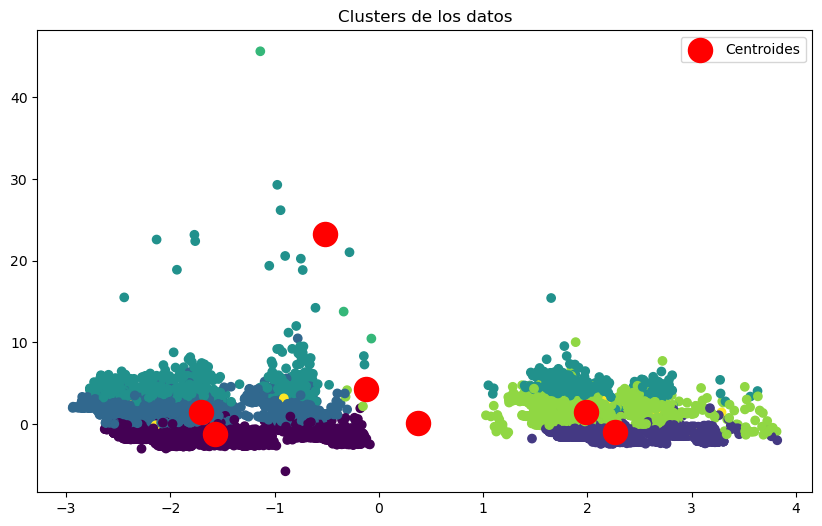

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
X_train = kmeans.fit_predict(X_train_pca)
X_test = kmeans.predict(X_test_pca)

# gráfico de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=X_train, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de los datos')
plt.legend()
plt.show()


### Modelo Predictivo

MODELO 2

19:11:43 - cmdstanpy - INFO - Chain [1] start processing
19:11:44 - cmdstanpy - INFO - Chain [1] done processing
19:11:44 - cmdstanpy - INFO - Chain [1] start processing
19:11:44 - cmdstanpy - INFO - Chain [1] done processing
19:11:44 - cmdstanpy - INFO - Chain [1] start processing
19:11:44 - cmdstanpy - INFO - Chain [1] done processing
19:11:45 - cmdstanpy - INFO - Chain [1] start processing
19:11:45 - cmdstanpy - INFO - Chain [1] done processing
19:11:45 - cmdstanpy - INFO - Chain [1] start processing
19:11:45 - cmdstanpy - INFO - Chain [1] done processing


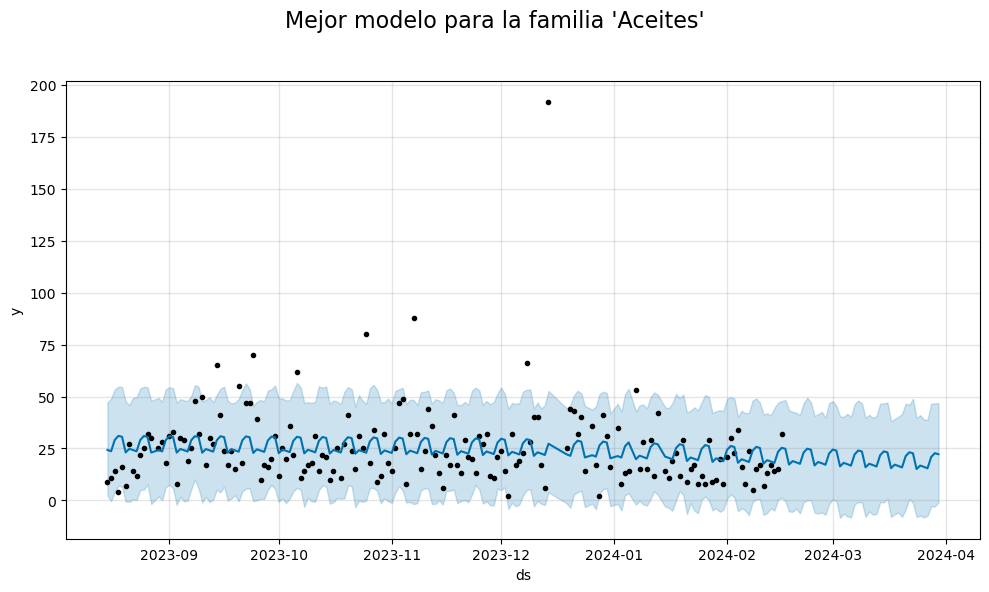

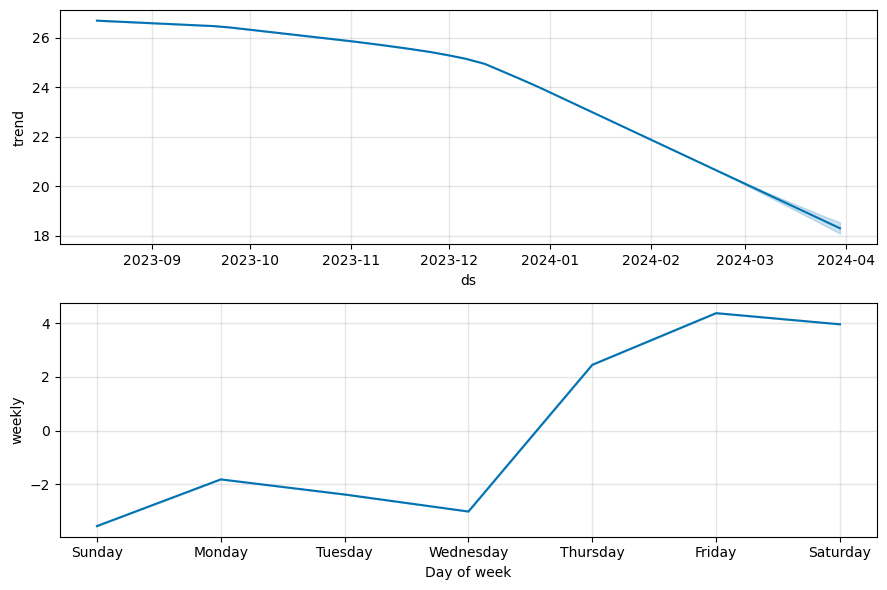

19:11:46 - cmdstanpy - INFO - Chain [1] start processing
19:11:46 - cmdstanpy - INFO - Chain [1] done processing
19:11:47 - cmdstanpy - INFO - Chain [1] start processing
19:11:47 - cmdstanpy - INFO - Chain [1] done processing
19:11:47 - cmdstanpy - INFO - Chain [1] start processing
19:11:47 - cmdstanpy - INFO - Chain [1] done processing
19:11:48 - cmdstanpy - INFO - Chain [1] start processing
19:11:48 - cmdstanpy - INFO - Chain [1] done processing
19:11:48 - cmdstanpy - INFO - Chain [1] start processing
19:11:48 - cmdstanpy - INFO - Chain [1] done processing


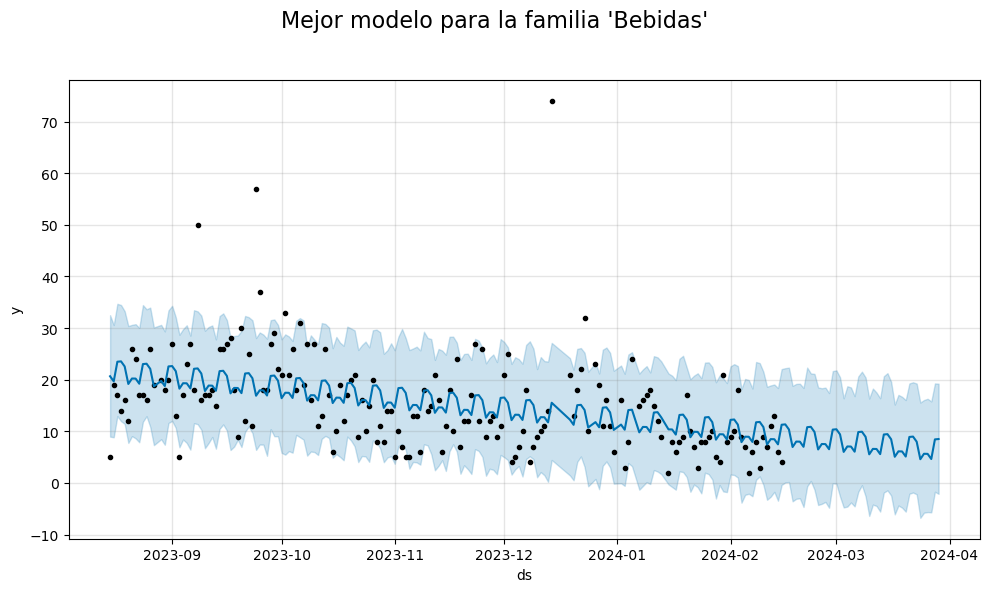

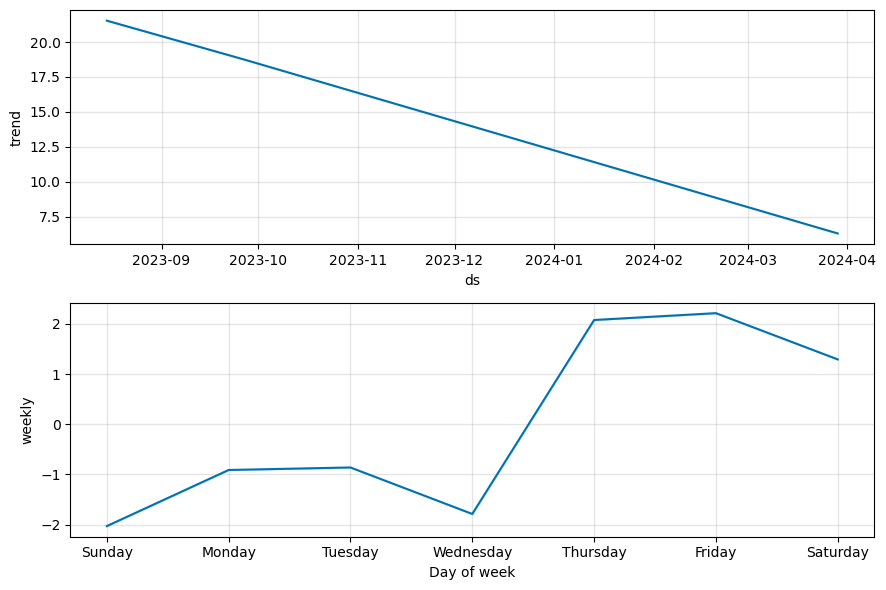

19:11:49 - cmdstanpy - INFO - Chain [1] start processing
19:11:49 - cmdstanpy - INFO - Chain [1] done processing
19:11:50 - cmdstanpy - INFO - Chain [1] start processing
19:11:50 - cmdstanpy - INFO - Chain [1] done processing
19:11:50 - cmdstanpy - INFO - Chain [1] start processing
19:11:50 - cmdstanpy - INFO - Chain [1] done processing
19:11:50 - cmdstanpy - INFO - Chain [1] start processing
19:11:51 - cmdstanpy - INFO - Chain [1] done processing
19:11:51 - cmdstanpy - INFO - Chain [1] start processing
19:11:51 - cmdstanpy - INFO - Chain [1] done processing


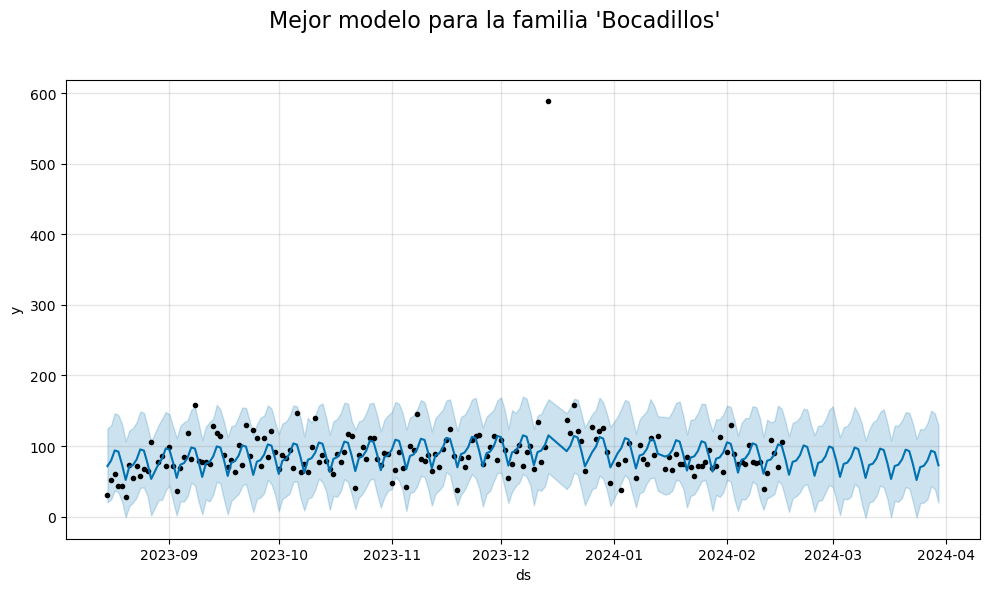

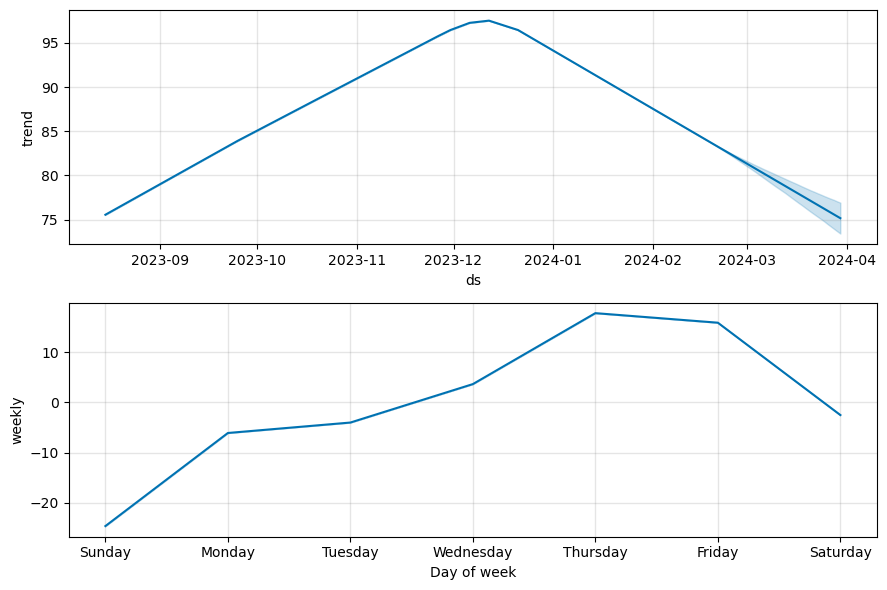

19:11:52 - cmdstanpy - INFO - Chain [1] start processing
19:11:52 - cmdstanpy - INFO - Chain [1] done processing
19:11:52 - cmdstanpy - INFO - Chain [1] start processing
19:11:53 - cmdstanpy - INFO - Chain [1] done processing
19:11:53 - cmdstanpy - INFO - Chain [1] start processing
19:11:53 - cmdstanpy - INFO - Chain [1] done processing
19:11:53 - cmdstanpy - INFO - Chain [1] start processing
19:11:53 - cmdstanpy - INFO - Chain [1] done processing
19:11:54 - cmdstanpy - INFO - Chain [1] start processing
19:11:54 - cmdstanpy - INFO - Chain [1] done processing


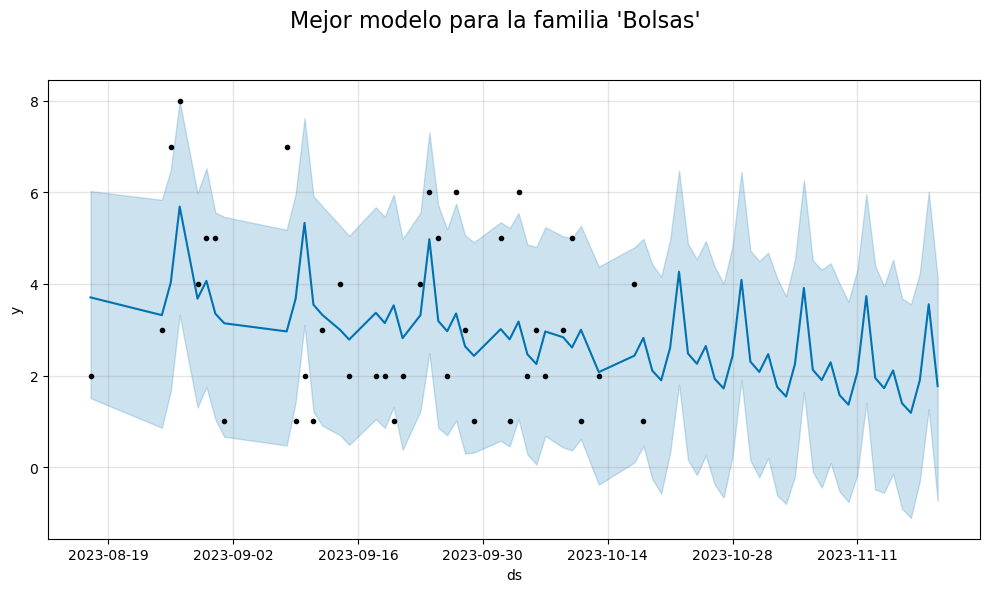

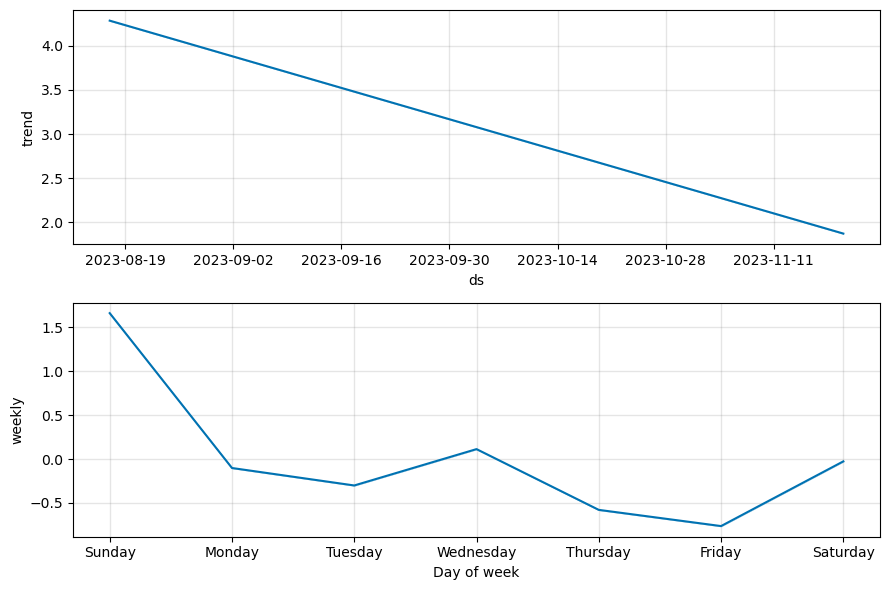

19:11:56 - cmdstanpy - INFO - Chain [1] start processing
19:11:56 - cmdstanpy - INFO - Chain [1] done processing
19:11:56 - cmdstanpy - INFO - Chain [1] start processing
19:11:56 - cmdstanpy - INFO - Chain [1] done processing
19:11:57 - cmdstanpy - INFO - Chain [1] start processing
19:11:57 - cmdstanpy - INFO - Chain [1] done processing


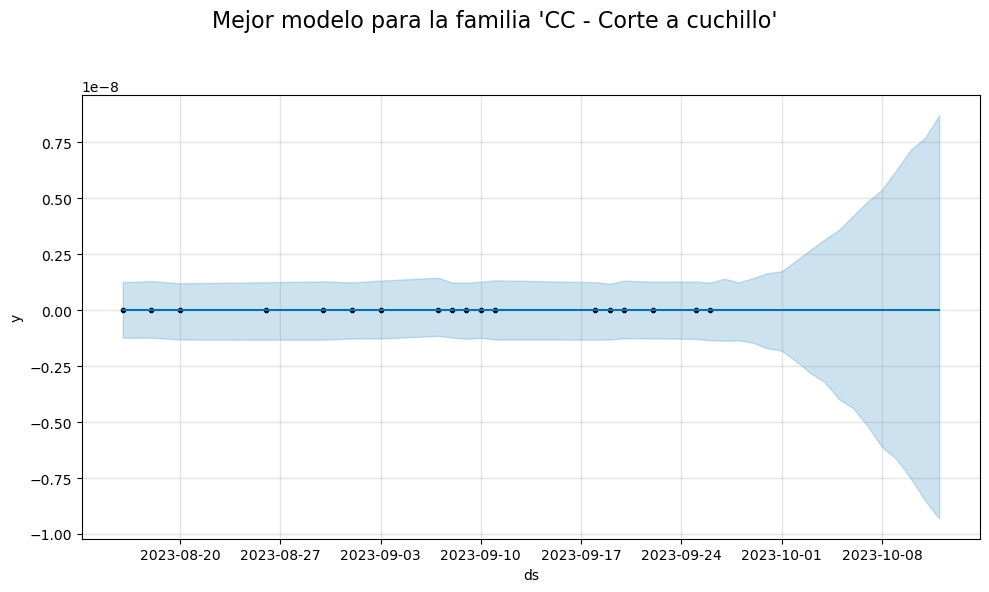

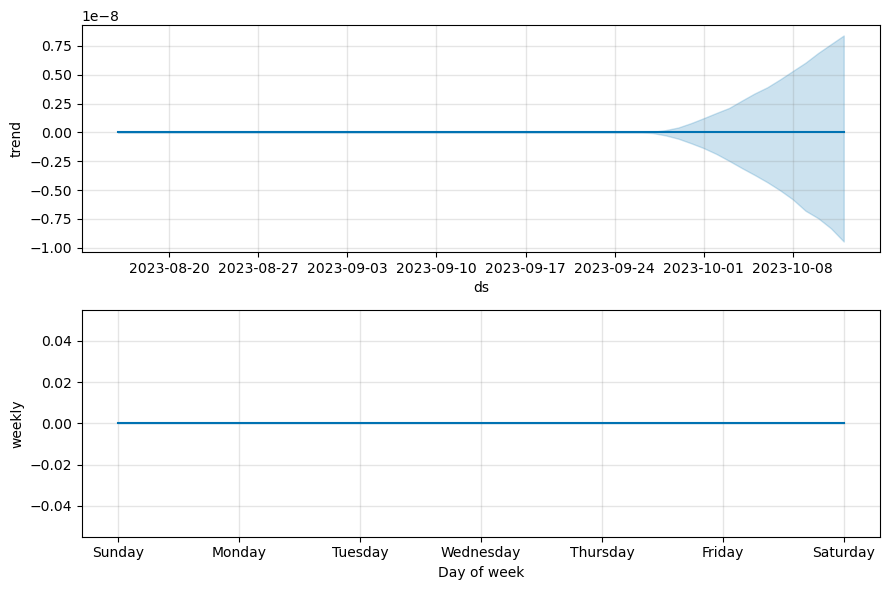

19:11:58 - cmdstanpy - INFO - Chain [1] start processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing
19:11:58 - cmdstanpy - INFO - Chain [1] start processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing


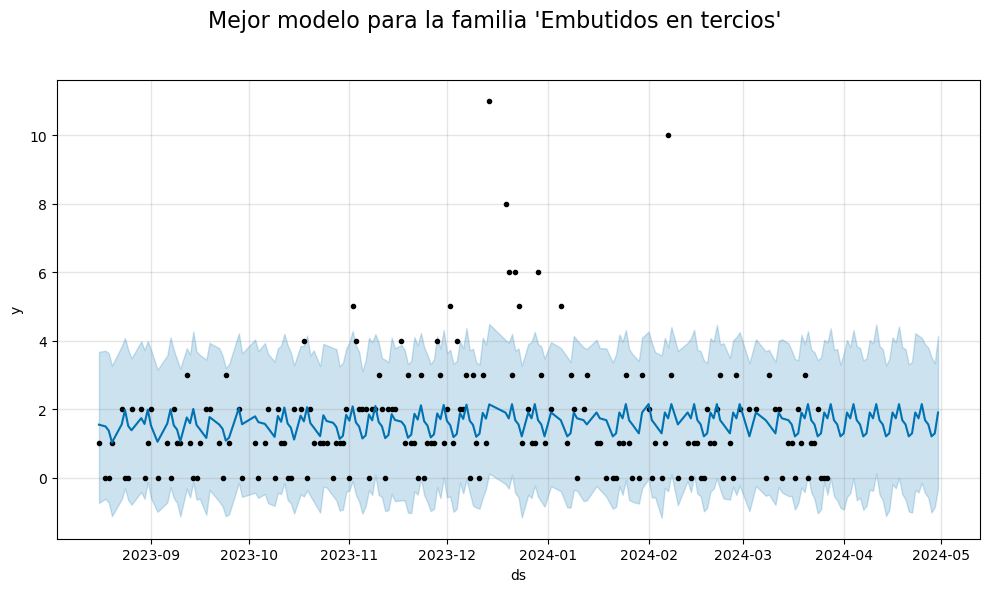

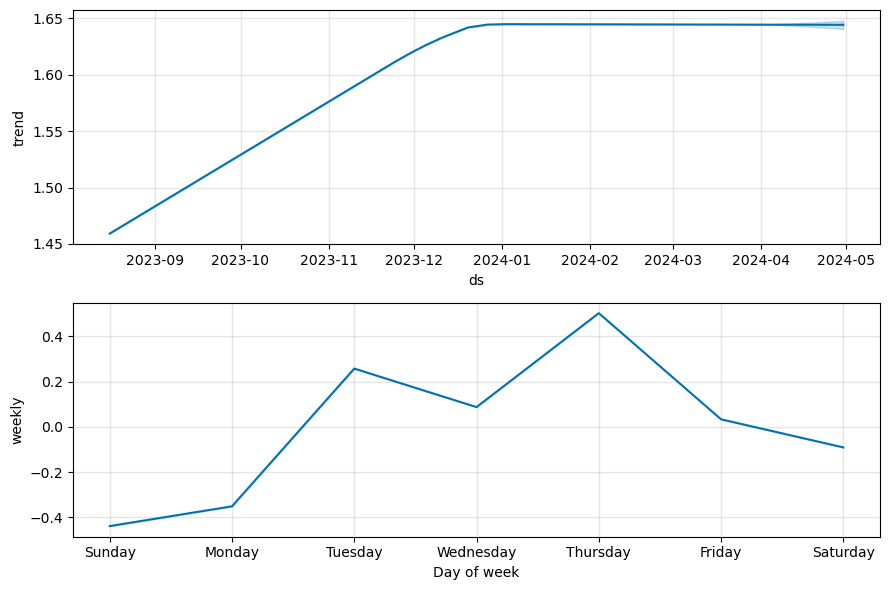

19:12:00 - cmdstanpy - INFO - Chain [1] start processing
19:12:00 - cmdstanpy - INFO - Chain [1] done processing
19:12:01 - cmdstanpy - INFO - Chain [1] start processing
19:12:01 - cmdstanpy - INFO - Chain [1] done processing
19:12:01 - cmdstanpy - INFO - Chain [1] start processing
19:12:01 - cmdstanpy - INFO - Chain [1] done processing
19:12:02 - cmdstanpy - INFO - Chain [1] start processing
19:12:02 - cmdstanpy - INFO - Chain [1] done processing
19:12:02 - cmdstanpy - INFO - Chain [1] start processing
19:12:02 - cmdstanpy - INFO - Chain [1] done processing


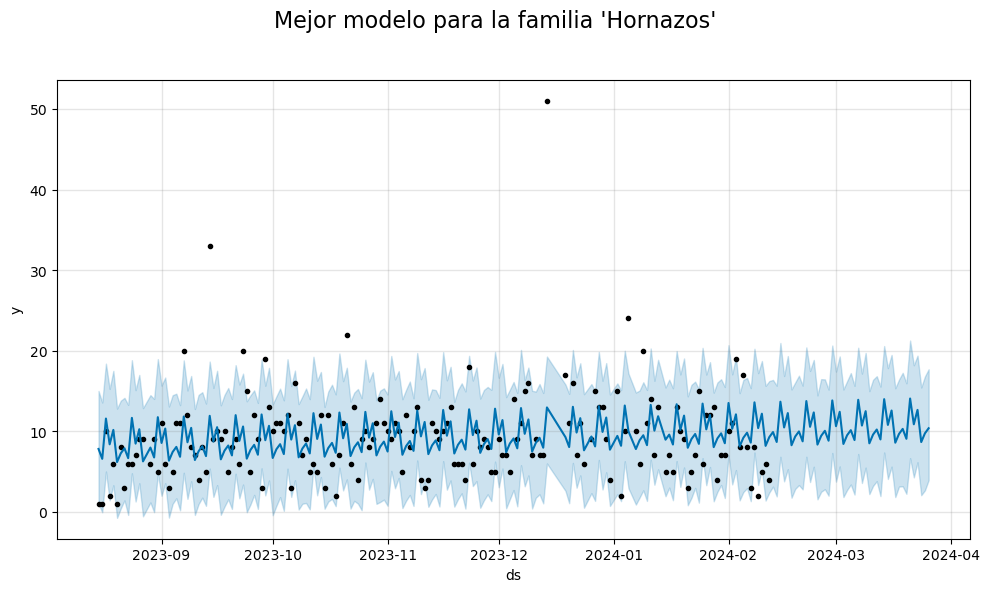

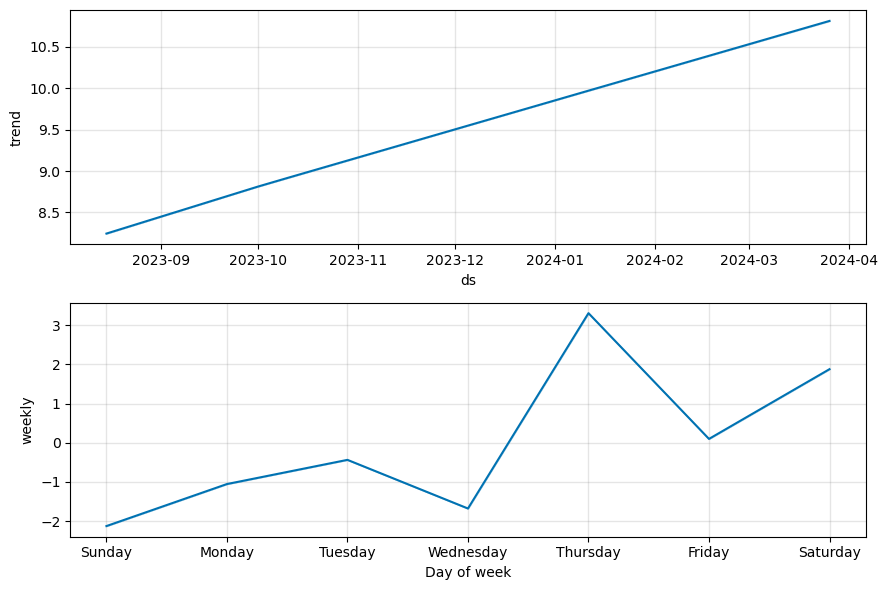

19:12:03 - cmdstanpy - INFO - Chain [1] start processing
19:12:03 - cmdstanpy - INFO - Chain [1] done processing
19:12:04 - cmdstanpy - INFO - Chain [1] start processing
19:12:04 - cmdstanpy - INFO - Chain [1] done processing
19:12:04 - cmdstanpy - INFO - Chain [1] start processing
19:12:04 - cmdstanpy - INFO - Chain [1] done processing
19:12:04 - cmdstanpy - INFO - Chain [1] start processing
19:12:04 - cmdstanpy - INFO - Chain [1] done processing
19:12:05 - cmdstanpy - INFO - Chain [1] start processing
19:12:05 - cmdstanpy - INFO - Chain [1] done processing


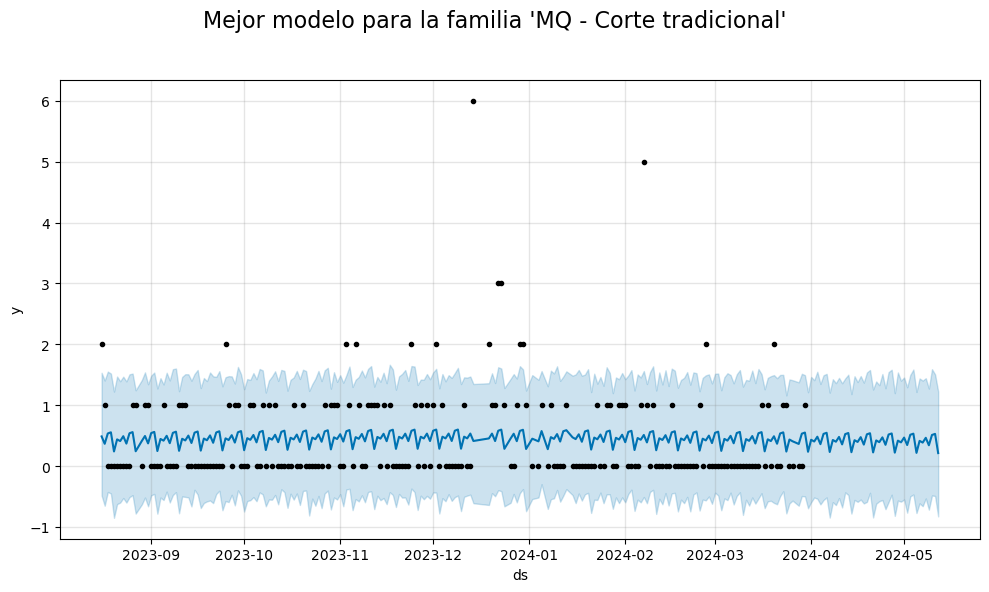

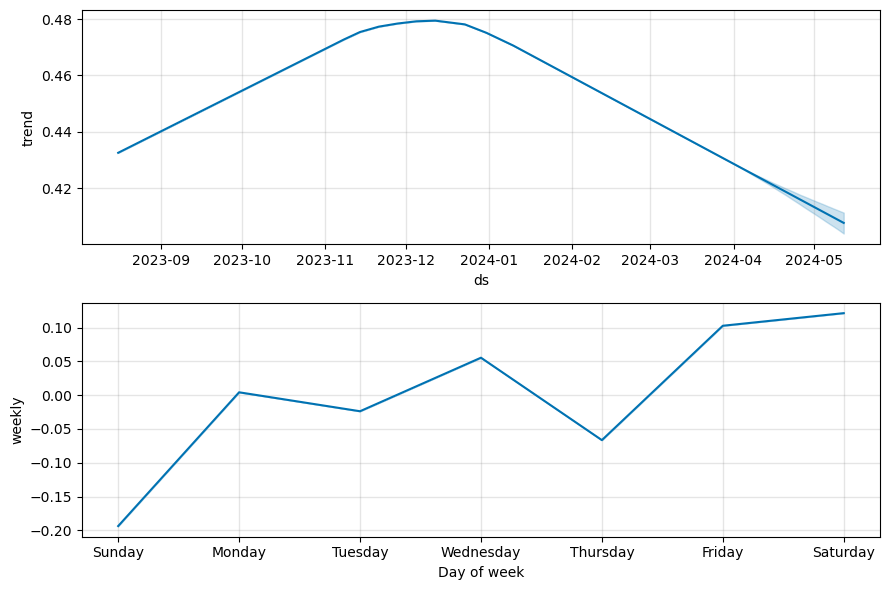

19:12:06 - cmdstanpy - INFO - Chain [1] start processing
19:12:06 - cmdstanpy - INFO - Chain [1] done processing
19:12:06 - cmdstanpy - INFO - Chain [1] start processing
19:12:06 - cmdstanpy - INFO - Chain [1] done processing
19:12:06 - cmdstanpy - INFO - Chain [1] start processing
19:12:06 - cmdstanpy - INFO - Chain [1] done processing
19:12:07 - cmdstanpy - INFO - Chain [1] start processing
19:12:07 - cmdstanpy - INFO - Chain [1] done processing
19:12:07 - cmdstanpy - INFO - Chain [1] start processing
19:12:07 - cmdstanpy - INFO - Chain [1] done processing


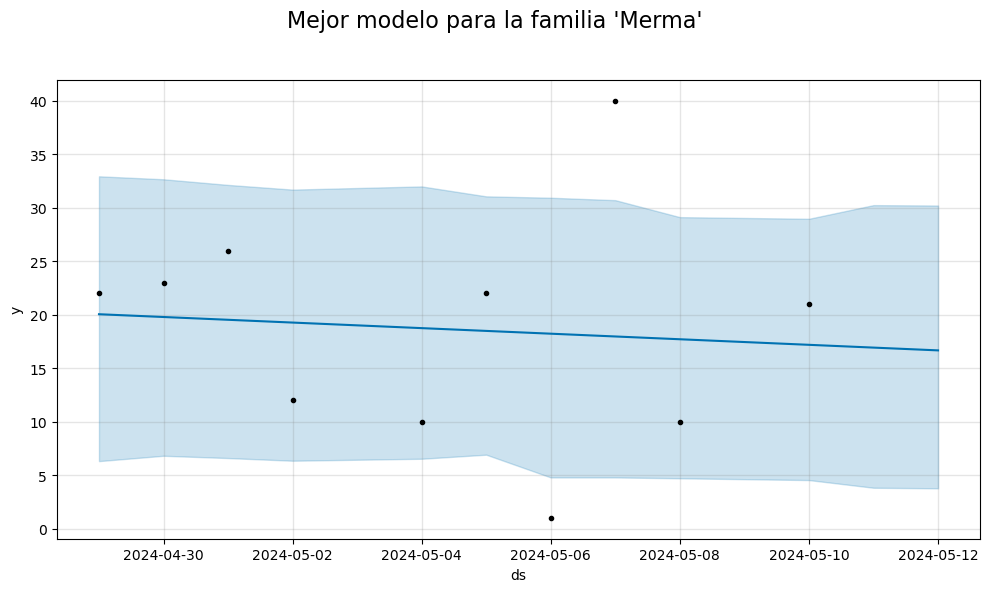

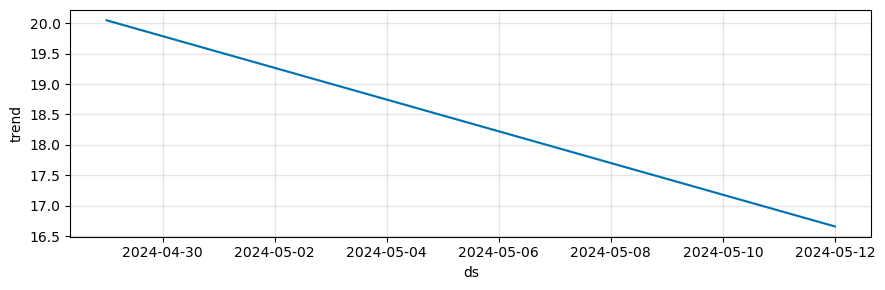

19:12:08 - cmdstanpy - INFO - Chain [1] start processing
19:12:08 - cmdstanpy - INFO - Chain [1] done processing
19:12:08 - cmdstanpy - INFO - Chain [1] start processing
19:12:14 - cmdstanpy - INFO - Chain [1] done processing
19:12:15 - cmdstanpy - INFO - Chain [1] start processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing
19:12:15 - cmdstanpy - INFO - Chain [1] start processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing
19:12:15 - cmdstanpy - INFO - Chain [1] start processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing


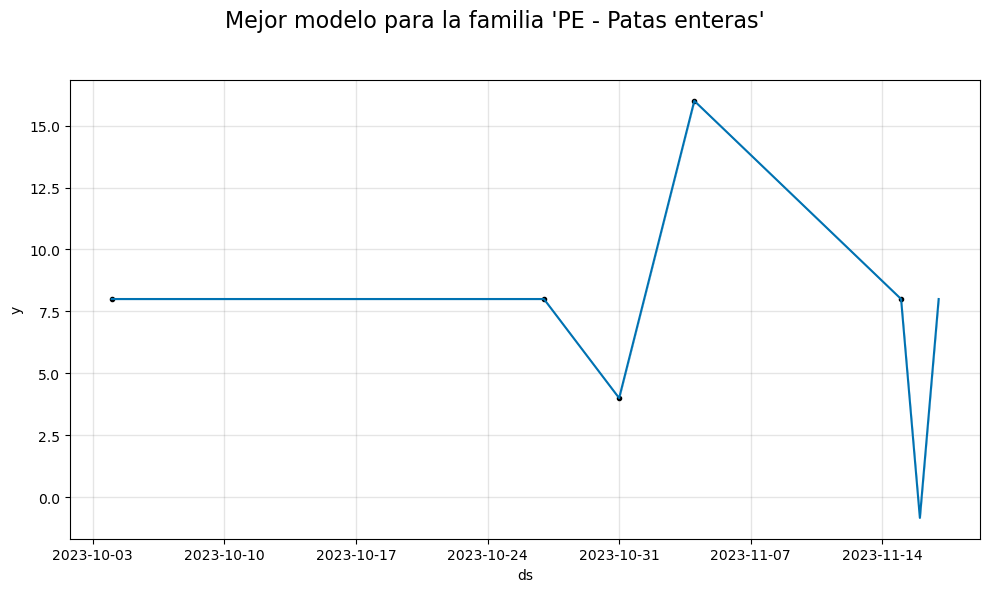

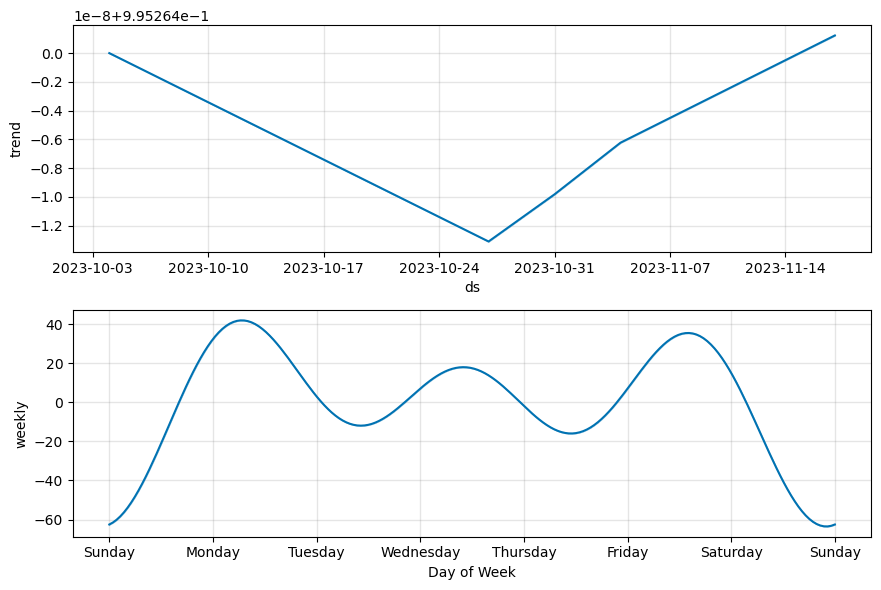

19:12:16 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing
19:12:17 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing
19:12:17 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing
19:12:18 - cmdstanpy - INFO - Chain [1] start processing
19:12:18 - cmdstanpy - INFO - Chain [1] done processing
19:12:18 - cmdstanpy - INFO - Chain [1] start processing
19:12:18 - cmdstanpy - INFO - Chain [1] done processing


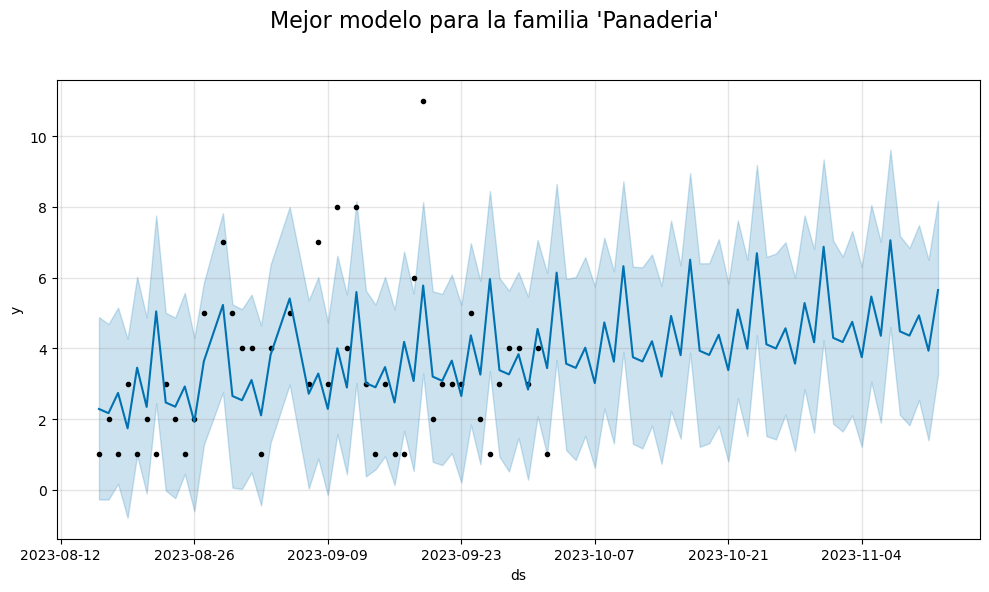

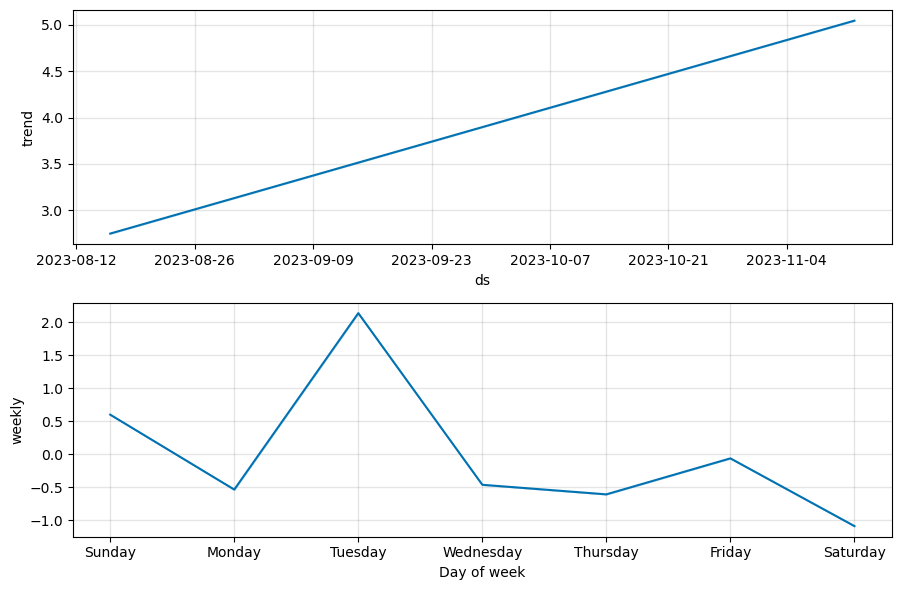

19:12:19 - cmdstanpy - INFO - Chain [1] start processing
19:12:19 - cmdstanpy - INFO - Chain [1] done processing
19:12:20 - cmdstanpy - INFO - Chain [1] start processing
19:12:20 - cmdstanpy - INFO - Chain [1] done processing
19:12:20 - cmdstanpy - INFO - Chain [1] start processing
19:12:20 - cmdstanpy - INFO - Chain [1] done processing
19:12:20 - cmdstanpy - INFO - Chain [1] start processing
19:12:20 - cmdstanpy - INFO - Chain [1] done processing
19:12:21 - cmdstanpy - INFO - Chain [1] start processing
19:12:21 - cmdstanpy - INFO - Chain [1] done processing


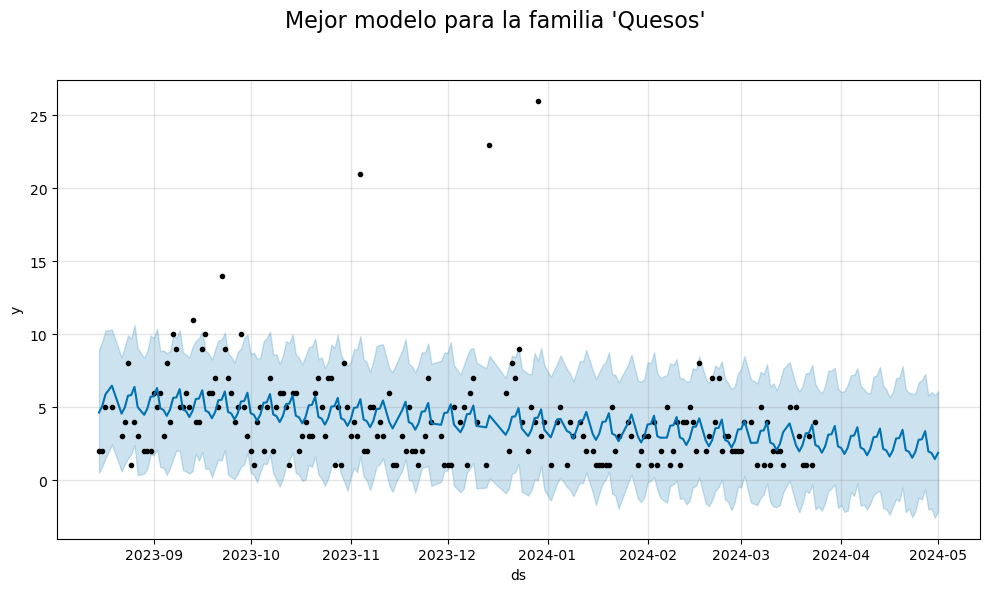

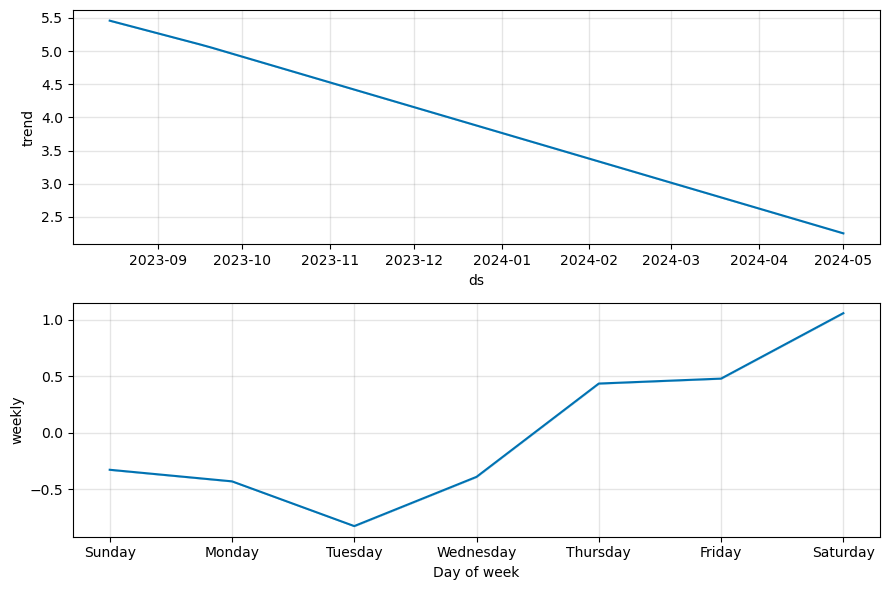

19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:22 - cmdstanpy - INFO - Chain [1] done processing
19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:22 - cmdstanpy - INFO - Chain [1] done processing
19:12:23 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing
19:12:23 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing
19:12:23 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing


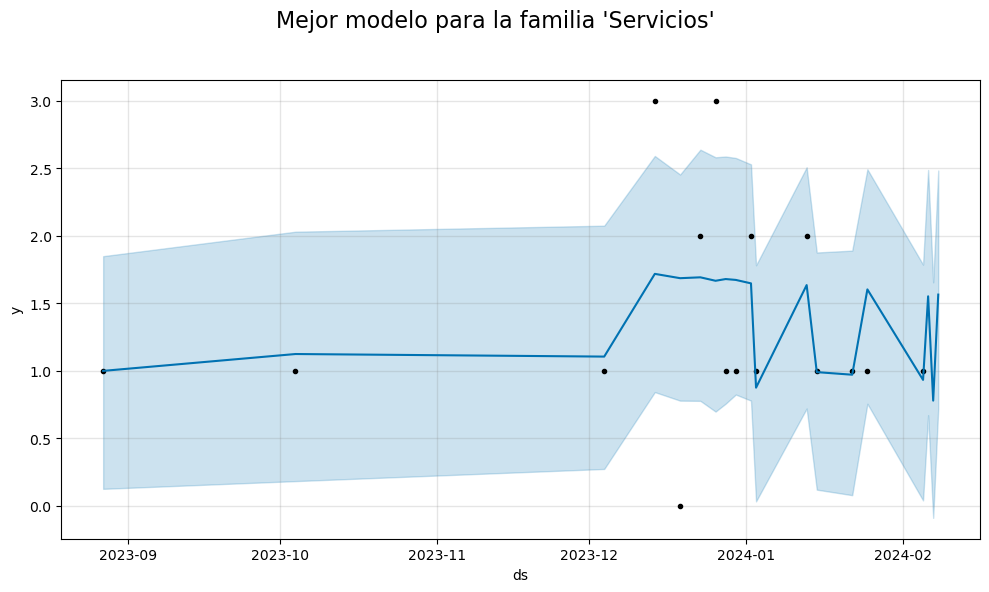

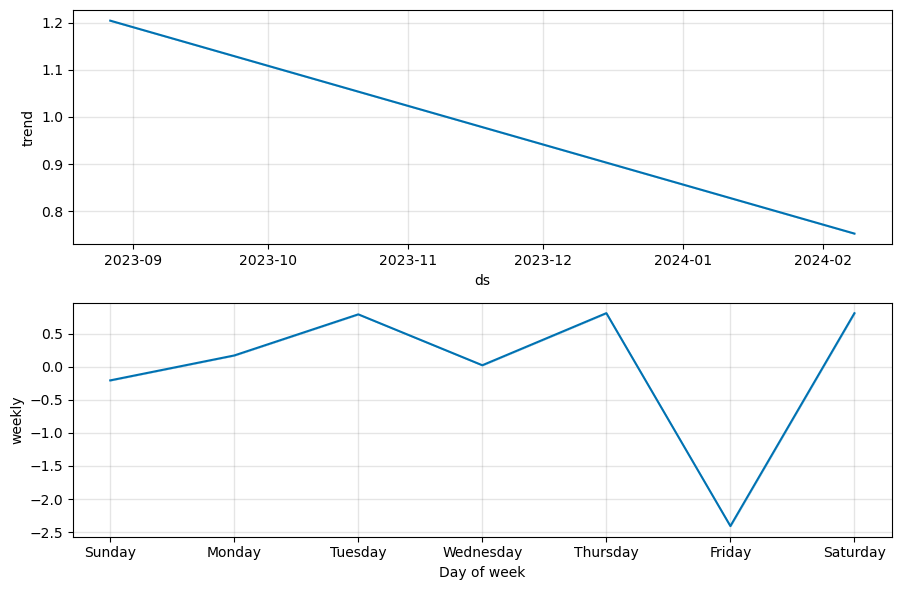

19:12:24 - cmdstanpy - INFO - Chain [1] start processing
19:12:25 - cmdstanpy - INFO - Chain [1] done processing
19:12:25 - cmdstanpy - INFO - Chain [1] start processing
19:12:25 - cmdstanpy - INFO - Chain [1] done processing
19:12:25 - cmdstanpy - INFO - Chain [1] start processing
19:12:25 - cmdstanpy - INFO - Chain [1] done processing
19:12:26 - cmdstanpy - INFO - Chain [1] start processing
19:12:26 - cmdstanpy - INFO - Chain [1] done processing
19:12:26 - cmdstanpy - INFO - Chain [1] start processing
19:12:26 - cmdstanpy - INFO - Chain [1] done processing


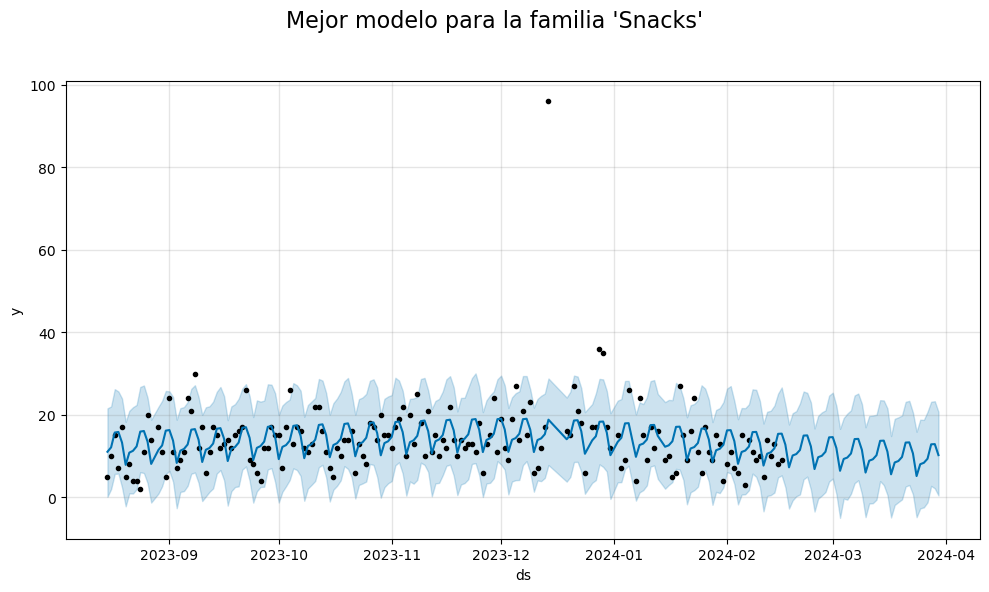

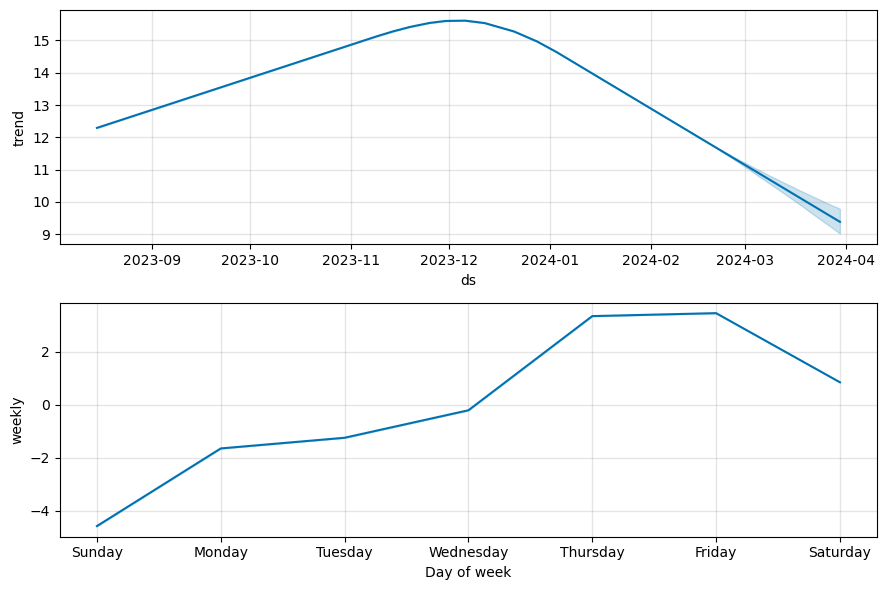

19:12:27 - cmdstanpy - INFO - Chain [1] start processing
19:12:28 - cmdstanpy - INFO - Chain [1] done processing
19:12:28 - cmdstanpy - INFO - Chain [1] start processing
19:12:28 - cmdstanpy - INFO - Chain [1] done processing
19:12:28 - cmdstanpy - INFO - Chain [1] start processing
19:12:29 - cmdstanpy - INFO - Chain [1] done processing
19:12:29 - cmdstanpy - INFO - Chain [1] start processing
19:12:29 - cmdstanpy - INFO - Chain [1] done processing
19:12:29 - cmdstanpy - INFO - Chain [1] start processing
19:12:29 - cmdstanpy - INFO - Chain [1] done processing


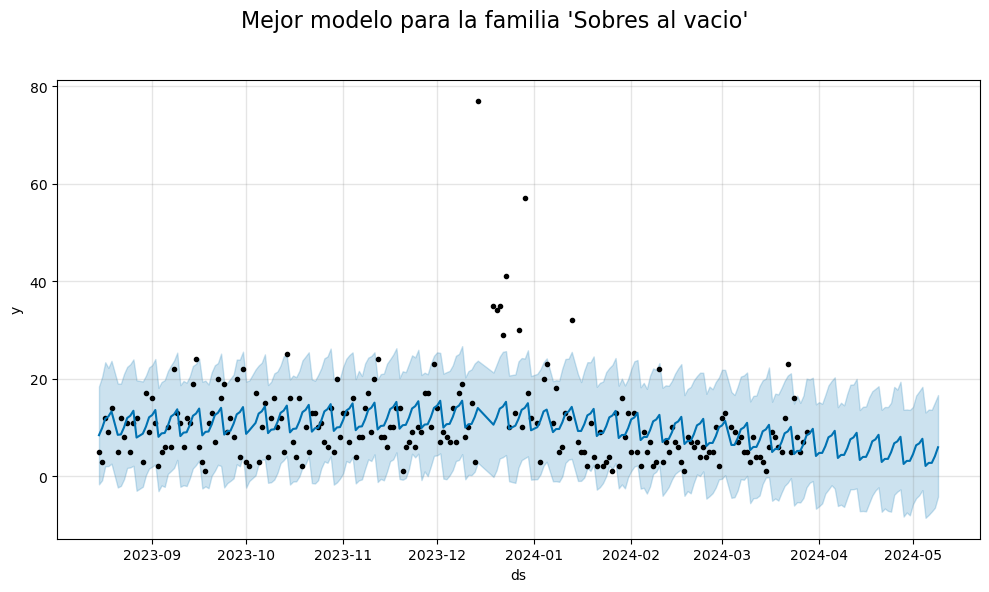

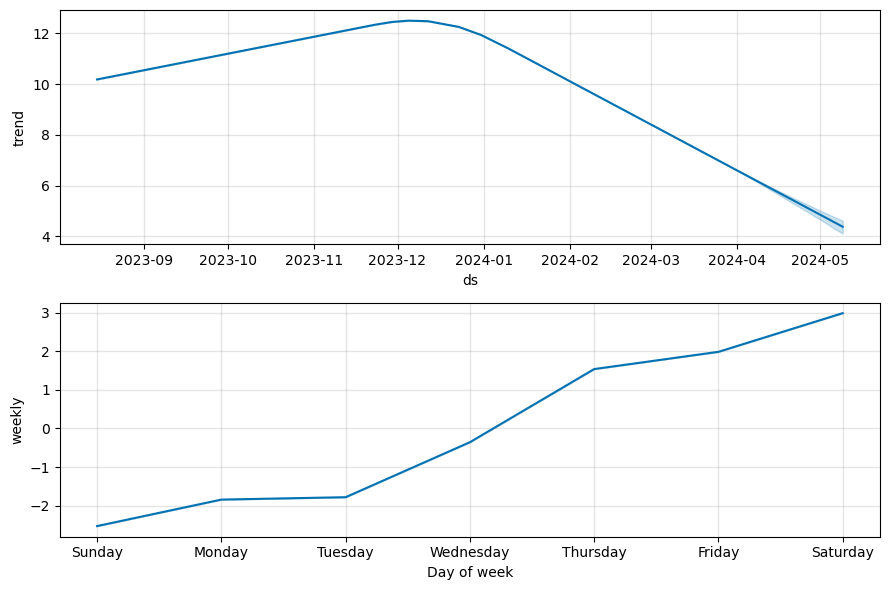

19:12:30 - cmdstanpy - INFO - Chain [1] start processing
19:12:31 - cmdstanpy - INFO - Chain [1] done processing
19:12:31 - cmdstanpy - INFO - Chain [1] start processing
19:12:31 - cmdstanpy - INFO - Chain [1] done processing
19:12:31 - cmdstanpy - INFO - Chain [1] start processing
19:12:31 - cmdstanpy - INFO - Chain [1] done processing
19:12:32 - cmdstanpy - INFO - Chain [1] start processing
19:12:32 - cmdstanpy - INFO - Chain [1] done processing
19:12:32 - cmdstanpy - INFO - Chain [1] start processing
19:12:32 - cmdstanpy - INFO - Chain [1] done processing


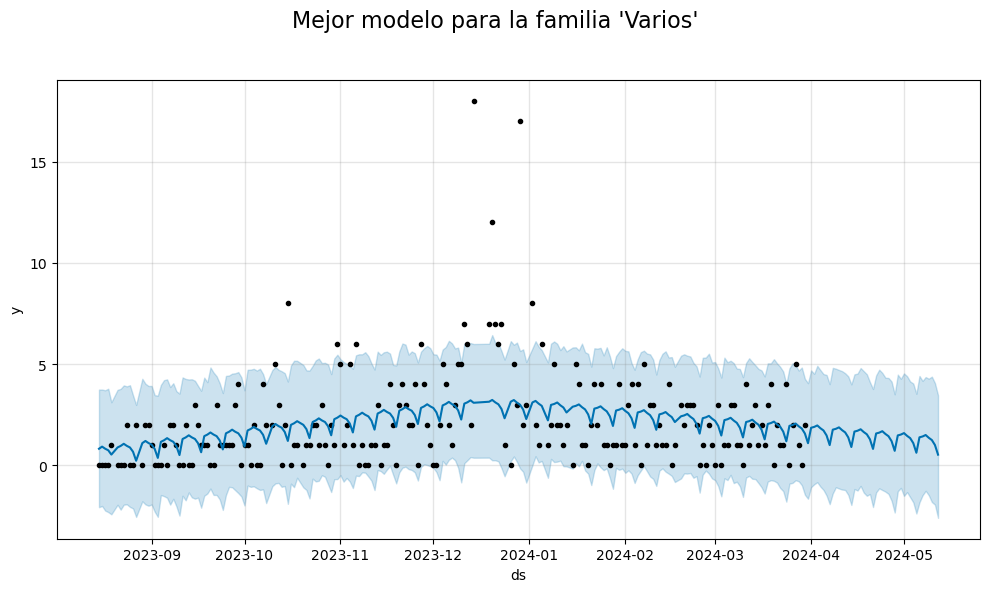

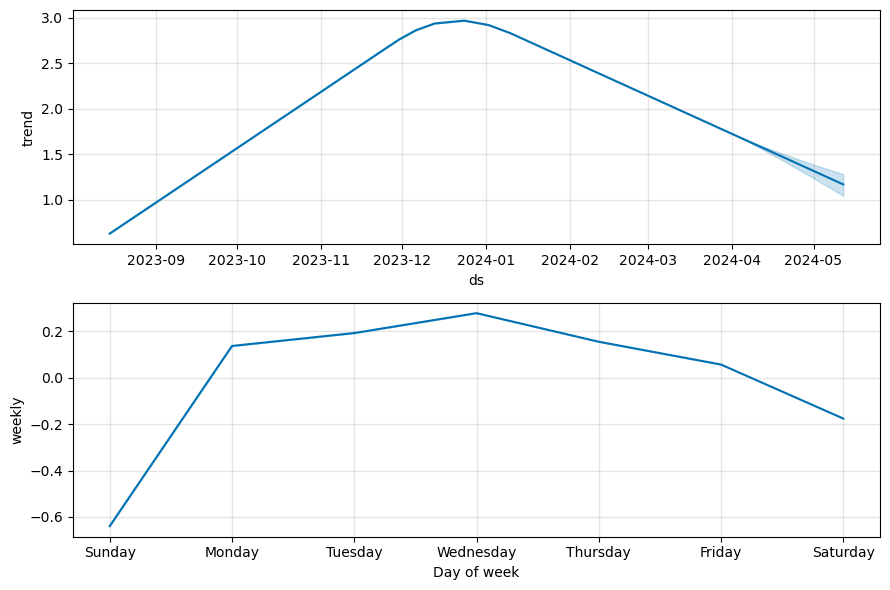

19:12:33 - cmdstanpy - INFO - Chain [1] start processing
19:12:33 - cmdstanpy - INFO - Chain [1] done processing
19:12:33 - cmdstanpy - INFO - Chain [1] start processing
19:12:34 - cmdstanpy - INFO - Chain [1] done processing
19:12:34 - cmdstanpy - INFO - Chain [1] start processing
19:12:34 - cmdstanpy - INFO - Chain [1] done processing
19:12:34 - cmdstanpy - INFO - Chain [1] start processing
19:12:34 - cmdstanpy - INFO - Chain [1] done processing
19:12:35 - cmdstanpy - INFO - Chain [1] start processing
19:12:35 - cmdstanpy - INFO - Chain [1] done processing


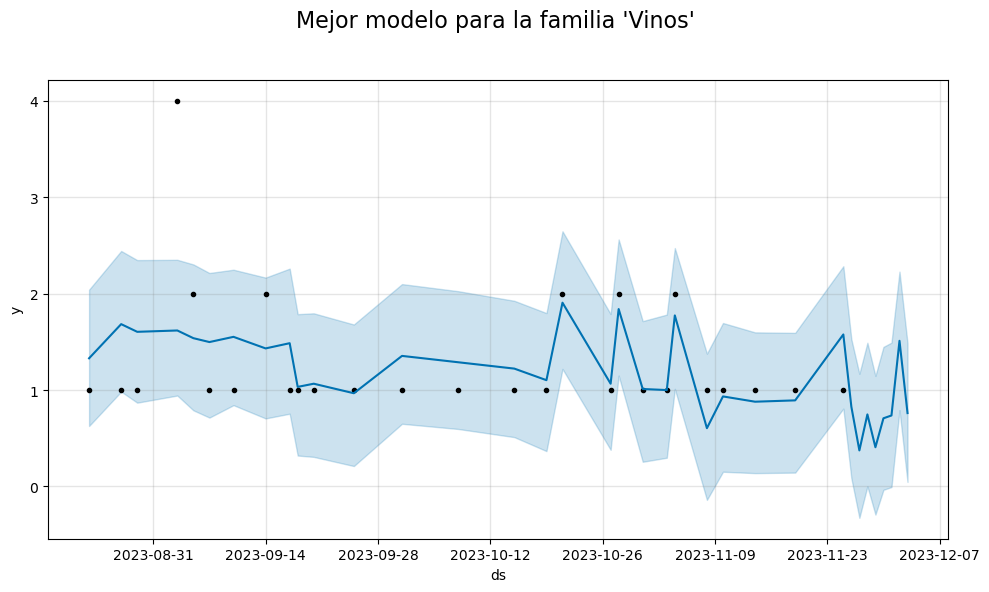

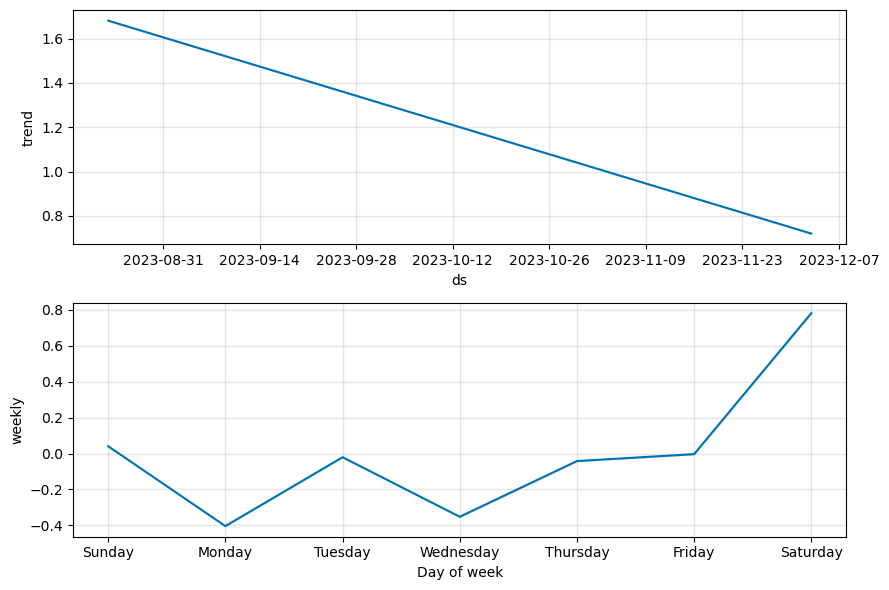

                   Familia        MAE          MSE       RMSE
0                  Aceites  13.860105   483.056479  20.824721
1                  Bebidas   7.171570   110.733143   9.262941
2               Bocadillos  30.908463  2467.405844  44.557462
3                   Bolsas   2.337262    12.407847   3.075184
4    CC - Corte a cuchillo   0.201188     0.111516   0.284764
5     Embutidos en tercios   1.440389     3.620942   1.791049
6                 Hornazos   5.107585    59.297438   7.331112
7   MQ - Corte tradicional   0.667971     0.733371   0.818159
8                    Merma   8.658214   132.117293   9.670862
9       PE - Patas enteras  17.298022   430.885243  19.672238
10               Panaderia   2.787899    14.486391   3.723421
11                  Quesos   2.911656    17.356263   3.701562
12               Servicios   8.447335   428.235229  10.231589
13                  Snacks   6.243728    82.832060   8.301313
14         Sobres al vacio   7.421987   114.482528   9.622951
15      

In [57]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib
import os

# Función para calcular métricas de evaluación
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Lista para almacenar las métricas de cada familia
metrics = []

# Lista para almacenar las métricas promedio de validación cruzada de cada familia
cv_metrics = []

models = {}

tscv = TimeSeriesSplit(n_splits=5)

# Crear directorio para guardar los modelos y gráficos
if not os.path.exists('models'):
    os.makedirs('models')
if not os.path.exists('graphs'):
    os.makedirs('graphs')

for family in family_data:
    data_family = family_data[family]

    family_metrics = []
    best_model = None
    best_forecast = None
    best_mae = float('inf')

    for train_index, test_index in tscv.split(data_family):
        train = data_family.iloc[train_index]
        test = data_family.iloc[test_index]

        # Crear y ajustar el modelo Prophet
        model_family = Prophet()
        model_family.fit(train)

        # Guardar el modelo
        models[family] = model_family
        joblib.dump(model_family, f'models/{family}_model.joblib')

        # Hacer una predicción para el período de prueba
        future_family = model_family.make_future_dataframe(periods=len(test))
        forecast_family = model_family.predict(future_family)

        # Obtener las predicciones para el período de prueba
        y_pred = forecast_family['yhat'][-len(test):].values
        y_true = test['y'].values

        # Calcular las métricas de evaluación
        mae, mse, rmse = evaluate_model(y_true, y_pred)
        family_metrics.append((mae, mse, rmse))

        # Almacenar el mejor modelo para esta familia
        if mae < best_mae:
            best_mae = mae
            best_model = model_family
            best_forecast = forecast_family

    # Calcular las métricas promedio de validación cruzada para la familia
    avg_mae = np.mean([m[0] for m in family_metrics])
    avg_mse = np.mean([m[1] for m in family_metrics])
    avg_rmse = np.mean([m[2] for m in family_metrics])
    cv_metrics.append((family, avg_mae, avg_mse, avg_rmse))

    # Guardar los gráficos del mejor modelo para esta familia
    if best_model is not None and best_forecast is not None:
        fig = best_model.plot(best_forecast)
        fig.suptitle(f"Mejor modelo para la familia '{family}'", fontsize=16)
        fig.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para no cortar el título
        plt.savefig(f'graphs/{family}_forecast.png')
        plt.show()

        fig2 = best_model.plot_components(best_forecast)
        plt.savefig(f'graphs/{family}_components.png')
        plt.show()

# Mostrar las métricas promedio de validación cruzada para cada familia
cv_metrics_df = pd.DataFrame(cv_metrics, columns=['Familia', 'MAE', 'MSE', 'RMSE'])
print(cv_metrics_df)

# Crear directorio para guardar las métricas si no existe
if not os.path.exists('metrics'):
    os.makedirs('metrics')

# Guardar el DataFrame de métricas en un archivo CSV
cv_metrics_df.to_csv('metrics/cv_metrics.csv', index=False)
